In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
from bioinfokit import analys, visuz
import math 
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests
import statsmodels.api
import umap.umap_ as umap

In [2]:
plt.style.use('seaborn-poster')

In [3]:
cd /Users/davidchen/Documents/GitHub/Sandor_David

/Users/davidchen/Documents/GitHub/Sandor_David


# Read in the raw read counts

In [4]:
raw_data = pd.read_excel(io = "MiniScreen01_normalized data.xlsx", sheet_name="average")

In [5]:
df = raw_data.copy()
df.set_index("fileID", inplace=True)
df = df.iloc[:30, 2:-1]
df

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5,mKate2_g6
fileID,,,,,,,,,,,,,,,,,,,,,
S1a,620.0,438.0,411.0,300.0,656.0,1411.0,2099.0,1858.0,948.0,2090.0,...,696.0,649.0,566.0,1297.0,7.0,1142.0,989.0,582.0,3.0,0.0
S1b,133.0,108.0,65.0,44.0,132.0,317.0,451.0,306.0,196.0,444.0,...,84.0,106.0,95.0,313.0,0.0,203.0,188.0,132.0,2.0,1.0
S2a,1023.0,675.0,618.0,497.0,1172.0,2495.0,2230.0,2010.0,988.0,2140.0,...,936.0,1461.0,1346.0,1975.0,0.0,1104.0,1467.0,629.0,6.0,0.0
S2b,1005.0,619.0,589.0,458.0,1065.0,2428.0,2190.0,1946.0,869.0,2134.0,...,887.0,1442.0,1312.0,1893.0,0.0,1112.0,1413.0,582.0,6.0,0.0
S3a,965.0,975.0,573.0,399.0,958.0,1569.0,1301.0,1096.0,499.0,1506.0,...,1724.0,2863.0,3033.0,1768.0,0.0,696.0,865.0,438.0,0.0,0.0
S3b,964.0,815.0,479.0,370.0,879.0,1446.0,1297.0,1015.0,525.0,1410.0,...,1579.0,2501.0,2825.0,1601.0,1.0,667.0,834.0,469.0,0.0,0.0
S4a,888.0,638.0,591.0,437.0,1076.0,1734.0,2148.0,1805.0,966.0,2228.0,...,716.0,1186.0,1172.0,1518.0,0.0,1045.0,1188.0,576.0,6.0,0.0
S4b,937.0,655.0,568.0,442.0,1049.0,1794.0,2261.0,1780.0,1037.0,2240.0,...,768.0,1131.0,1146.0,1502.0,0.0,997.0,1207.0,652.0,4.0,0.0
S5a,136.0,129.0,114.0,86.0,179.0,310.0,338.0,230.0,139.0,299.0,...,82.0,244.0,145.0,417.0,0.0,167.0,171.0,94.0,0.0,0.0


In [6]:
df.describe()

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5,mKate2_g6
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,586.633333,486.666667,392.366667,306.466667,620.866667,1196.966667,1302.866667,1123.266667,588.033333,1306.933333,...,651.566667,1032.766667,1086.900000,1487.200000,0.533333,658.566667,814.300000,424.033333,2.366667,0.200000
std,345.039077,330.174075,281.436890,176.090638,356.950082,663.421772,679.798892,612.492136,314.005214,698.408582,...,611.353596,867.467288,1097.149012,996.970943,1.357821,343.361344,423.808606,215.985390,2.220334,0.550861
min,45.000000,43.000000,38.000000,23.000000,51.000000,108.000000,150.000000,98.000000,48.000000,127.000000,...,26.000000,66.000000,60.000000,238.000000,0.000000,51.000000,102.000000,37.000000,0.000000,0.000000
25%,403.750000,325.750000,235.000000,228.250000,447.250000,769.000000,803.000000,838.750000,480.250000,858.000000,...,318.500000,469.750000,575.750000,904.500000,0.000000,502.250000,608.750000,247.250000,1.000000,0.000000
50%,554.500000,447.500000,342.000000,298.000000,616.500000,1312.500000,1501.500000,1200.500000,620.500000,1376.500000,...,488.500000,719.500000,743.500000,1315.000000,0.000000,698.500000,920.000000,493.500000,2.000000,0.000000
75%,924.750000,650.750000,571.750000,440.750000,955.500000,1568.250000,1697.500000,1675.250000,848.000000,1863.000000,...,751.250000,1456.250000,1256.750000,1827.250000,0.750000,894.750000,1090.750000,580.500000,4.000000,0.000000
max,1080.000000,1341.000000,1103.000000,643.000000,1172.000000,2495.000000,2261.000000,2010.000000,1037.000000,2240.000000,...,2398.000000,3013.000000,4360.000000,4577.000000,7.000000,1142.000000,1467.000000,743.000000,8.000000,2.000000


In [119]:
df.drop("mKate2_g1",axis=1, inplace=True)

In [120]:
df.T.describe()

fileID,S1a,S1b,S2a,S2b,S3a,S3b,S4a,S4b,S5a,S5b,...,S11a,S11b,S12a,S12b,S13a,S13b,S14a,S14b,S15a,S15b
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1152.786667,225.200000,1291.253333,1243.786667,962.946667,905.786667,1246.360000,1258.573333,194.013333,151.533333,...,1093.546667,1054.280000,800.306667,786.640000,1126.706667,1114.360000,1072.080000,749.853333,594.346667,579.600000
std,646.911024,132.775975,708.449508,686.433956,692.425484,642.598973,638.662763,656.621063,102.850520,86.655318,...,889.390397,852.872199,443.199820,454.941031,514.698436,524.669101,497.646509,379.630784,272.534872,282.835355
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,689.500000,121.500000,825.500000,784.500000,515.500000,482.500000,882.000000,868.500000,127.500000,94.000000,...,569.000000,529.500000,510.500000,489.000000,759.500000,703.500000,699.000000,483.000000,433.000000,403.500000
50%,989.000000,196.000000,1087.000000,1066.000000,792.000000,747.000000,1124.000000,1121.000000,168.000000,125.000000,...,865.000000,831.000000,699.000000,670.000000,1075.000000,1035.000000,1010.000000,692.000000,539.000000,544.000000
75%,1471.500000,291.000000,1649.000000,1629.500000,1230.500000,1156.000000,1579.500000,1555.000000,255.500000,202.500000,...,1277.500000,1237.500000,1077.000000,1080.000000,1400.500000,1478.500000,1340.500000,973.500000,770.000000,754.500000
max,3600.000000,639.000000,4275.000000,4196.000000,3542.000000,3391.000000,4001.000000,4182.000000,535.000000,464.000000,...,4577.000000,4280.000000,2799.000000,2874.000000,2929.000000,2833.000000,2752.000000,1947.000000,1666.000000,1822.000000


# Part 1: Implementation of original normalization approach

### Sum raw read counts

In [128]:
def sumeverysecondrow(df):
    sum_df = pd.DataFrame(columns = df.columns)   
    for i in range(0, len(df), 2):
        sum_df = sum_df.append(df.iloc[i,:] + df.iloc[i+1,:], ignore_index=True)
    sum_df.index = ["S" + str(identifier) for identifier in range(1, 16)]
    return sum_df

In [129]:
sum_df = sumeverysecondrow(df)

### Total Read Normalization

In [13]:
def total_read_norm(input_df):   
    total_read_norm = input_df.div(input_df.sum(axis=1), axis=0)
    return total_read_norm

In [14]:
total_read_normalization = total_read_norm(sum_df)

In [15]:
total_read_normalization

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5,mKate2_g6
S1,0.007285,0.005283,0.004605,0.003328,0.007624,0.016719,0.024672,0.020937,0.011069,0.024517,...,0.007547,0.007305,0.006395,0.015577,0.000068,0.013013,0.011388,0.006908,0.000048,0.000010
S2,0.010666,0.006806,0.006348,0.005023,0.011766,0.025893,0.023247,0.020807,0.009767,0.022480,...,0.009588,0.015269,0.013980,0.020344,0.000000,0.011655,0.015148,0.006369,0.000063,0.000000
S3,0.013763,0.012771,0.007506,0.005487,0.013107,0.021512,0.018536,0.015062,0.007306,0.020805,...,0.023567,0.038272,0.041796,0.024038,0.000007,0.009725,0.012122,0.006471,0.000000,0.000000
S4,0.009714,0.006882,0.006169,0.004679,0.011311,0.018779,0.023468,0.019082,0.010662,0.023782,...,0.007899,0.012333,0.012338,0.016075,0.000000,0.010869,0.012748,0.006536,0.000053,0.000000
S5,0.009299,0.008026,0.007563,0.005286,0.011537,0.022727,0.023923,0.016438,0.009685,0.021956,...,0.005788,0.016245,0.009299,0.025930,0.000000,0.010650,0.012425,0.007756,0.000000,0.000000
S6,0.007463,0.008275,0.006246,0.004543,0.008761,0.019226,0.025716,0.017198,0.009329,0.021579,...,0.005354,0.012412,0.011033,0.044861,0.000000,0.008924,0.016711,0.007058,0.000162,0.000000
S7,0.008185,0.006129,0.005971,0.005338,0.009530,0.018981,0.022619,0.016173,0.006762,0.019257,...,0.007474,0.012575,0.013128,0.124323,0.000000,0.009609,0.011902,0.009490,0.000000,0.000079
S8,0.007524,0.006061,0.005277,0.004839,0.008351,0.018577,0.023472,0.021207,0.008622,0.024515,...,0.008221,0.012838,0.012443,0.022231,0.000006,0.011227,0.013708,0.008746,0.000012,0.000000
S9,0.007130,0.004860,0.004566,0.003885,0.007337,0.015722,0.021450,0.022458,0.010354,0.024728,...,0.004446,0.008906,0.008692,0.031998,0.000007,0.012217,0.017171,0.008899,0.000087,0.000000
S10,0.007188,0.006552,0.004018,0.004065,0.008216,0.017012,0.024969,0.021116,0.009911,0.021649,...,0.006599,0.009699,0.011527,0.017216,0.000000,0.012037,0.013677,0.006858,0.000055,0.000000


### Library Pool Normalization

In [16]:
def library_pool_norm(total_read_normalization):
    library_pool_norm = total_read_normalization.copy()
    for column in range(len(library_pool_norm.columns)):
        library_pool_norm.iloc[:, column] = library_pool_norm.iloc[:, column].div(library_pool_norm.iloc[12, column])
    library_pool_norm.dropna(axis=1, inplace=True)
    return library_pool_norm

In [17]:
library_pool_normalization = library_pool_norm(total_read_normalization)

In [18]:
library_pool_normalization

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,0.578996,0.400333,0.368094,0.472096,0.645589,0.763014,1.255136,1.490569,0.984362,1.210264,...,0.584951,0.917862,0.362619,0.425053,0.989525,2.845960,1.425895,0.996933,1.080141,1.355219
S2,0.847692,0.515766,0.507397,0.712468,0.996290,1.181703,1.182667,1.481292,0.868621,1.109680,...,1.086171,1.166162,0.757950,0.929151,1.292340,0.000000,1.277099,1.326086,0.995901,1.768114
S3,1.093797,0.967846,0.599917,0.778256,1.109848,0.981749,0.943005,1.072277,0.649760,1.027035,...,3.573053,2.866258,1.899838,2.777891,1.526954,0.299816,1.065578,1.061223,1.011844,0.000000
S4,0.772007,0.521562,0.493075,0.663651,0.957784,0.857030,1.193903,1.358508,0.948174,1.173992,...,0.980037,0.960715,0.612221,0.820037,1.021142,0.000000,1.190966,1.116023,1.022019,1.491137
S5,0.739035,0.608219,0.604471,0.749826,0.976943,1.037223,1.217055,1.170232,0.861331,1.083811,...,0.964358,0.703950,0.806406,0.618054,1.647168,0.000000,1.166923,1.087710,1.212679,0.000000
S6,0.593125,0.627058,0.499253,0.644375,0.741878,0.877436,1.308242,1.224359,0.829669,1.065206,...,0.996143,0.651186,0.616132,0.733262,2.849734,0.000000,0.977769,1.462968,1.103519,4.545145
S7,0.650511,0.464478,0.477235,0.757199,0.806959,0.866232,1.150670,1.151389,0.601352,0.950619,...,0.779760,0.908968,0.624216,0.872537,7.897460,0.000000,1.052872,1.041981,1.483876,0.000000
S8,0.597916,0.459301,0.421768,0.686349,0.707106,0.847836,1.194080,1.509747,0.766799,1.210150,...,0.903213,0.999869,0.637270,0.826968,1.412215,0.259350,1.230140,1.200036,1.367440,0.345801
S9,0.566633,0.368307,0.364970,0.551119,0.621266,0.717513,1.091218,1.598824,0.920854,1.220659,...,0.596505,0.540763,0.442089,0.577701,2.032630,0.280531,1.338648,1.503178,1.391433,2.431268
S10,0.571223,0.496530,0.321108,0.576543,0.695676,0.776387,1.270225,1.503275,0.881378,1.068698,...,0.837153,0.802617,0.481451,0.766114,1.093622,0.000000,1.318927,1.197338,1.072318,1.538748


### Population Level Normalization

In [19]:
def pop_level_norm(library_pool_normalization):
    pop_level_norm = library_pool_normalization.copy()
    for column in range(len(pop_level_norm.columns)):
        pop_level_norm.iloc[:, column] = pop_level_norm.iloc[:, column].div(pop_level_norm.iloc[-1, column])
    return pop_level_norm

In [20]:
population_1 = pop_level_norm(library_pool_normalization.iloc[:4, :])
population_2 = pop_level_norm(library_pool_normalization.iloc[4:8, :])
population_3 = pop_level_norm(library_pool_normalization.iloc[8:12, :])

In [21]:
population_1

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,0.749987,0.767566,0.746527,0.711363,0.674045,0.890301,1.051288,1.097210,1.038166,1.030897,...,0.596867,0.955394,0.592301,0.518334,0.969038,inf,1.197259,0.893290,1.056870,0.908849
S2,1.098036,0.988888,1.029047,1.073559,1.040204,1.378836,0.990589,1.090382,0.916099,0.945220,...,1.108296,1.213847,1.238033,1.133060,1.265584,NaN,1.072322,1.188224,0.974445,1.185749
S3,1.416821,1.855668,1.216685,1.172690,1.158767,1.145525,0.789850,0.789305,0.685275,0.874823,...,3.645836,2.983461,3.103191,3.387519,1.495340,inf,0.894717,0.950897,0.990044,0.000000
S4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000


In [22]:
population_2

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S5,1.236018,1.324229,1.433182,1.092486,1.381608,1.223377,1.019241,0.775118,1.123282,0.895601,...,1.067697,0.704042,1.265407,0.747374,1.166372,0.0,0.948610,0.906397,0.886824,0.000000
S6,0.991987,1.365245,1.183713,0.938845,1.049175,1.034913,1.095607,0.810970,1.081990,0.880226,...,1.102888,0.651271,0.966830,0.886687,2.017917,0.0,0.794844,1.219104,0.806996,13.143831
S7,1.087964,1.011272,1.131510,1.103228,1.141214,1.021698,0.963646,0.762637,0.784237,0.785538,...,0.863318,0.909087,0.979516,1.055104,5.592249,0.0,0.855897,0.868292,1.085148,0.000000
S8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [23]:
population_3

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S9,0.943951,0.885842,1.017777,0.990248,0.944047,0.802417,0.805105,1.072620,0.979646,1.112293,...,0.740133,0.606870,0.752286,0.748043,1.530102,inf,1.014712,1.114319,0.988037,5.164773
S10,0.951598,1.194239,0.895461,1.035931,1.057116,0.868258,0.937177,1.008518,0.937650,0.973822,...,1.038724,0.900736,0.819267,0.992013,0.823246,NaN,0.999763,0.887597,0.761438,3.268781
S11,1.324855,1.431332,0.917351,1.504620,1.574374,0.971102,0.633543,0.831961,0.700098,0.674637,...,4.576157,3.967145,3.098080,4.487663,2.629207,NaN,0.866216,0.850456,0.679587,1.477723
S12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000


### Top Fraction Normalization

In [24]:
def top_frac_norm(pop_level_normalization):
    top_frac_norm = pop_level_normalization.copy().iloc[:3, :]
    for column in range(len(top_frac_norm.columns)):
        top_frac_norm.iloc[:, column] = top_frac_norm.iloc[:, column].div(top_frac_norm.iloc[0, column])
    return top_frac_norm

In [25]:
population_fold_change_1 = top_frac_norm(population_1)
population_fold_change_2 = top_frac_norm(population_2)
population_fold_change_3 = top_frac_norm(population_3)

In [26]:
population_fold_change_1

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.00000,1.000000
S2,1.464073,1.288342,1.378447,1.509157,1.543225,1.548730,0.942262,0.993776,0.882420,0.916891,...,1.856856,1.270521,2.090209,2.185965,1.306021,NaN,0.895647,1.330165,0.92201,1.304671
S3,1.889127,2.417600,1.629794,1.648511,1.719123,1.286671,0.751317,0.719374,0.660082,0.848604,...,6.108291,3.122755,5.239210,6.535396,1.543118,NaN,0.747304,1.064488,0.93677,0.000000


In [27]:
population_fold_change_2

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN
S6,0.802567,1.030973,0.825934,0.859366,0.759387,0.845948,1.074925,1.046253,0.963240,0.982833,...,1.03296,0.925046,0.764047,1.186404,1.730081,NaN,0.837904,1.344999,0.909984,inf
S7,0.880217,0.763668,0.789509,1.009833,0.826004,0.835146,0.945455,0.983898,0.698166,0.877108,...,0.80858,1.291240,0.774072,1.411749,4.794569,NaN,0.902264,0.957959,1.223634,NaN


In [28]:
population_fold_change_3

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
S10,1.008101,1.348140,0.879820,1.046133,1.119770,1.082052,1.164044,0.940238,0.957131,0.875509,...,1.403430,1.484232,1.089037,1.326144,0.538033,NaN,0.985268,0.796538,0.770657,0.632899
S11,1.403521,1.615788,0.901328,1.519437,1.667686,1.210221,0.786908,0.775634,0.714644,0.606528,...,6.182889,6.537059,4.118223,5.999203,1.718322,NaN,0.853657,0.763207,0.687816,0.286116


### Wrapper Function 

In [26]:
def normalization(df, population):
    #Sum read counts from both directions
    sum_df = sumeverysecondrow(df)
    #Total read normalization
    total_read_normalization = total_read_norm(sum_df)
    #Library pool normalization
    library_pool_normalization = library_pool_norm(total_read_normalization)
    #Population level normalization
    if population == "1":
        population = pop_level_norm(library_pool_normalization.iloc[:4, :])
    elif population == "2":
        population = pop_level_norm(library_pool_normalization.iloc[4:8, :])
    elif population == "3":
        population = pop_level_norm(library_pool_normalization.iloc[8:12, :])
    else:
        print("Must select Population 1, 2, or 3.")
    #Population fold change
    population_fold_change = top_frac_norm(population)
    return population_fold_change

# Part 2 Visualization

### Triple Bar Graph of Fold Change between Bottom 20 Fraction and Negative Condition compared to Upper 20 Fraction after Normalization

In [27]:
def fold_change_graph(df, population):
    data = normalization(df, population)
    x = [float(num) for num in range(data.shape[1])] 
    fig, ax = plt.subplots(figsize=(30,10))
    width = 0.2 # width of bar

    ax.bar([num + 0.5 * width for num in x], data.iloc[0,:], width, color='#6c757d', label='Top 20 Fraction')
    ax.bar([num + 1.5 * width for num in x], data.iloc[1,:], width, color='#0F52BA', label='Bottom 20 Fraction')
    ax.bar([num + 2.5 * width for num in x], data.iloc[2,:], width, color='#ffaa00', label='Negative')

    ax.set_ylim(0,8)
    ax.set_xlim(0,len(x))
    ax.set_xticks([num + 1.5 * width for num in x])
    ax.set_xticklabels(data.columns , rotation=45, horizontalalignment="right" )
    ax.set_xlabel('Gene', labelpad=20)
    ax.set_ylabel('Fold Change Compared to Top 20 Fraction', labelpad=20)
    ax.set_title('Normalized Read Count', pad=20)
    ax.legend(loc="upper right")
    fig.tight_layout()
    plt.show()

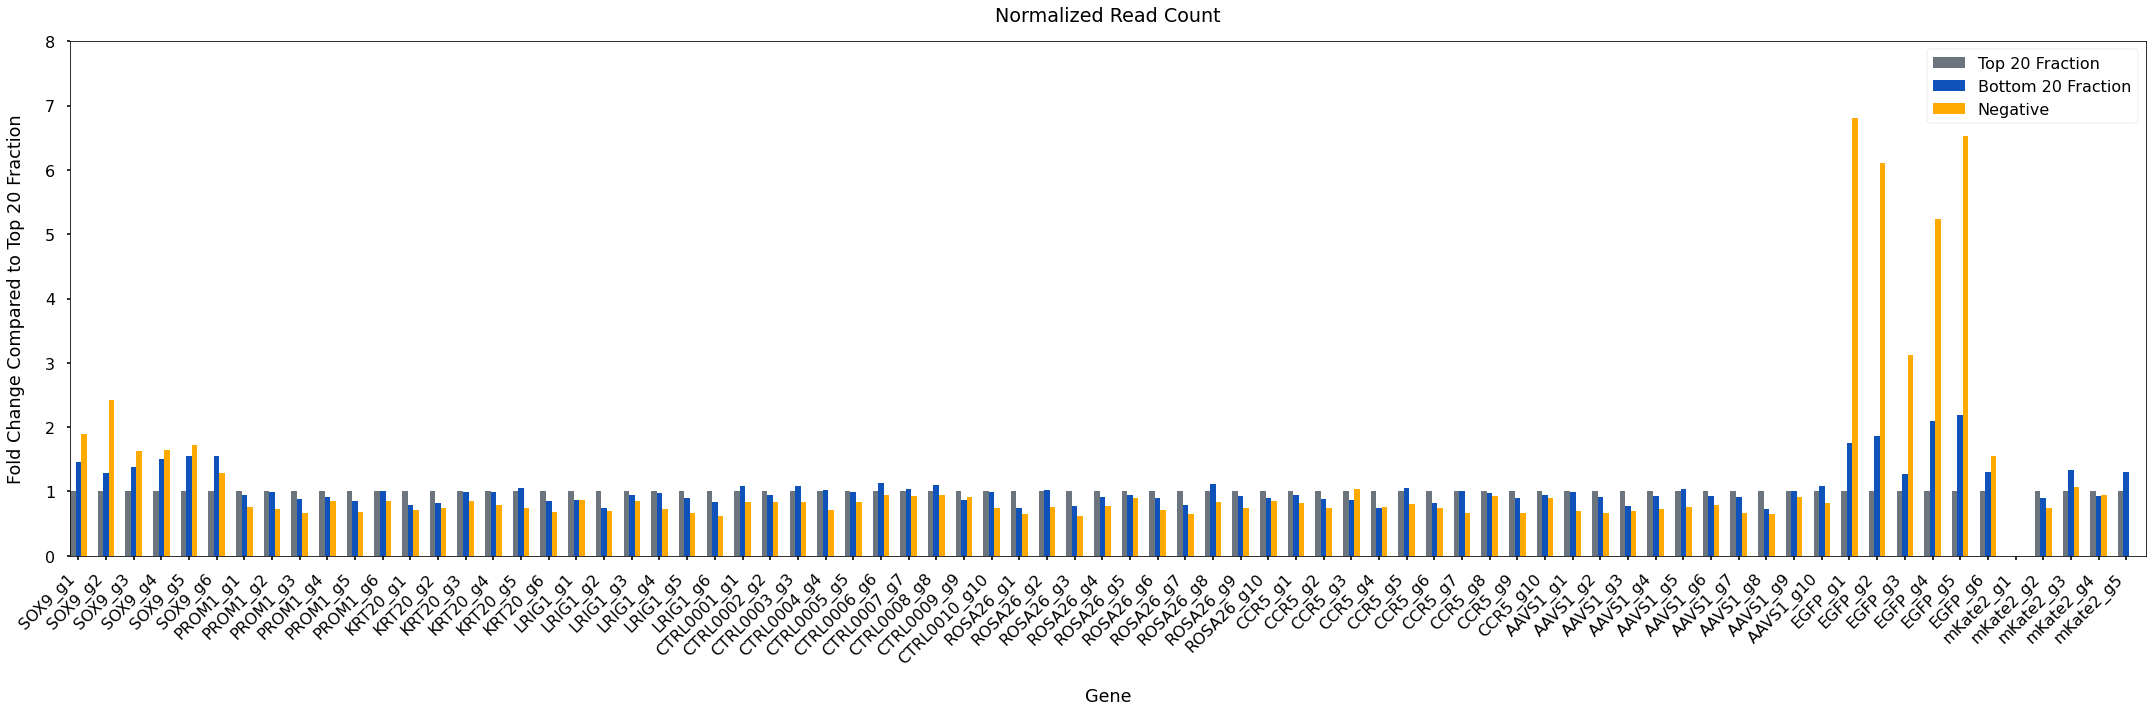

In [28]:
fold_change_graph(df, population="1")

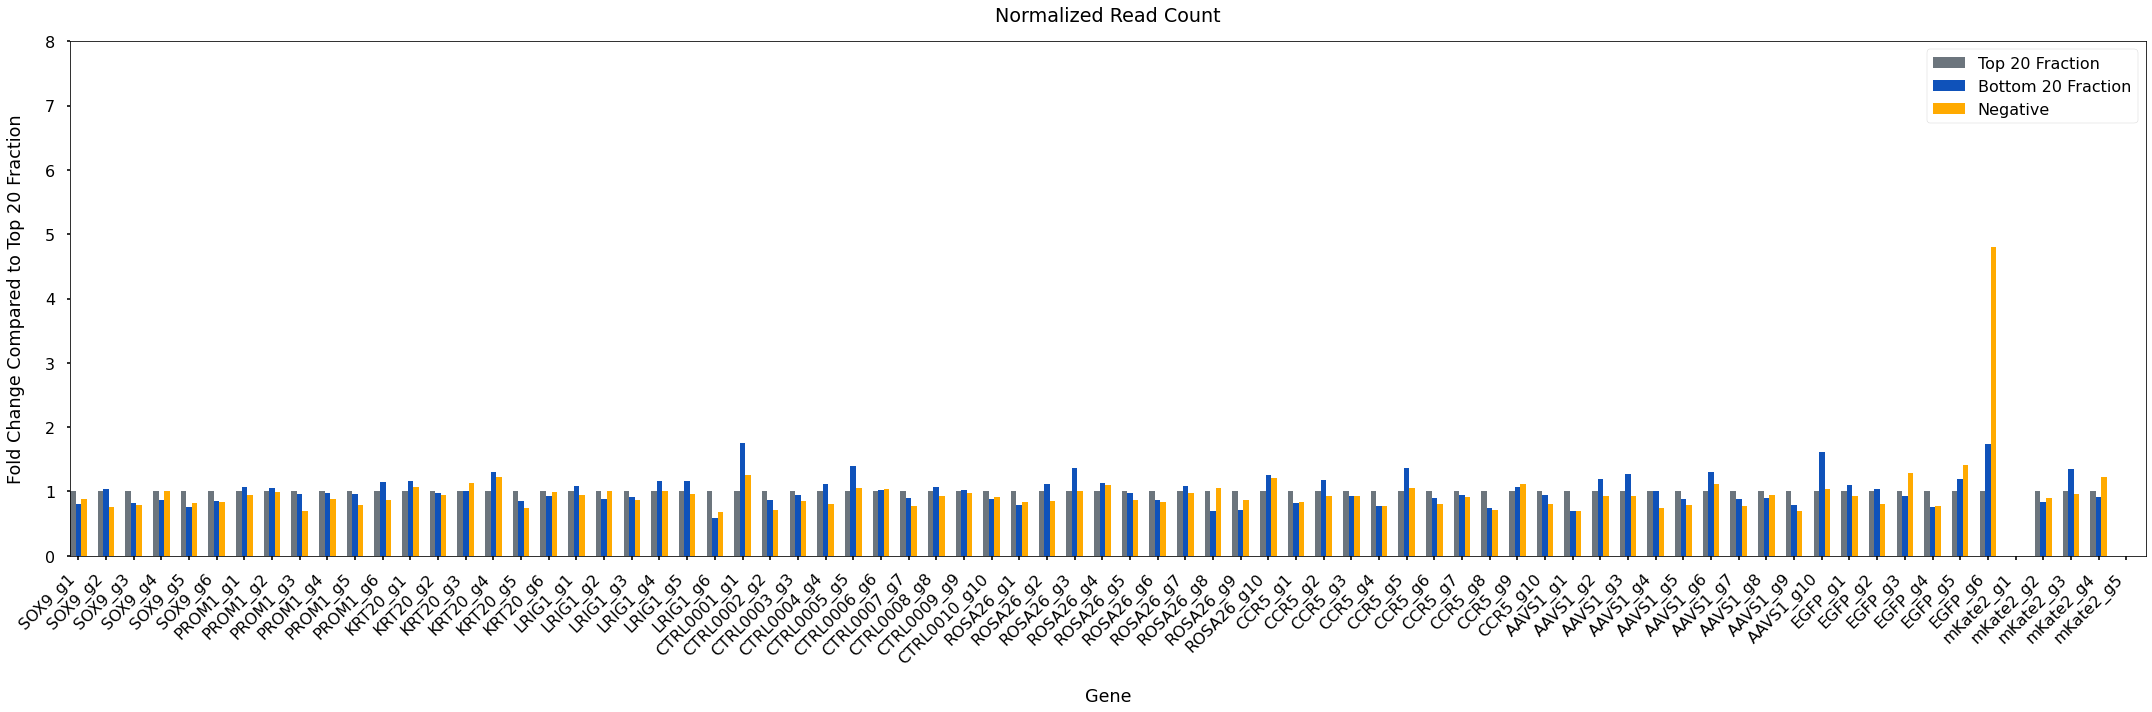

In [29]:
fold_change_graph(df, population="2")

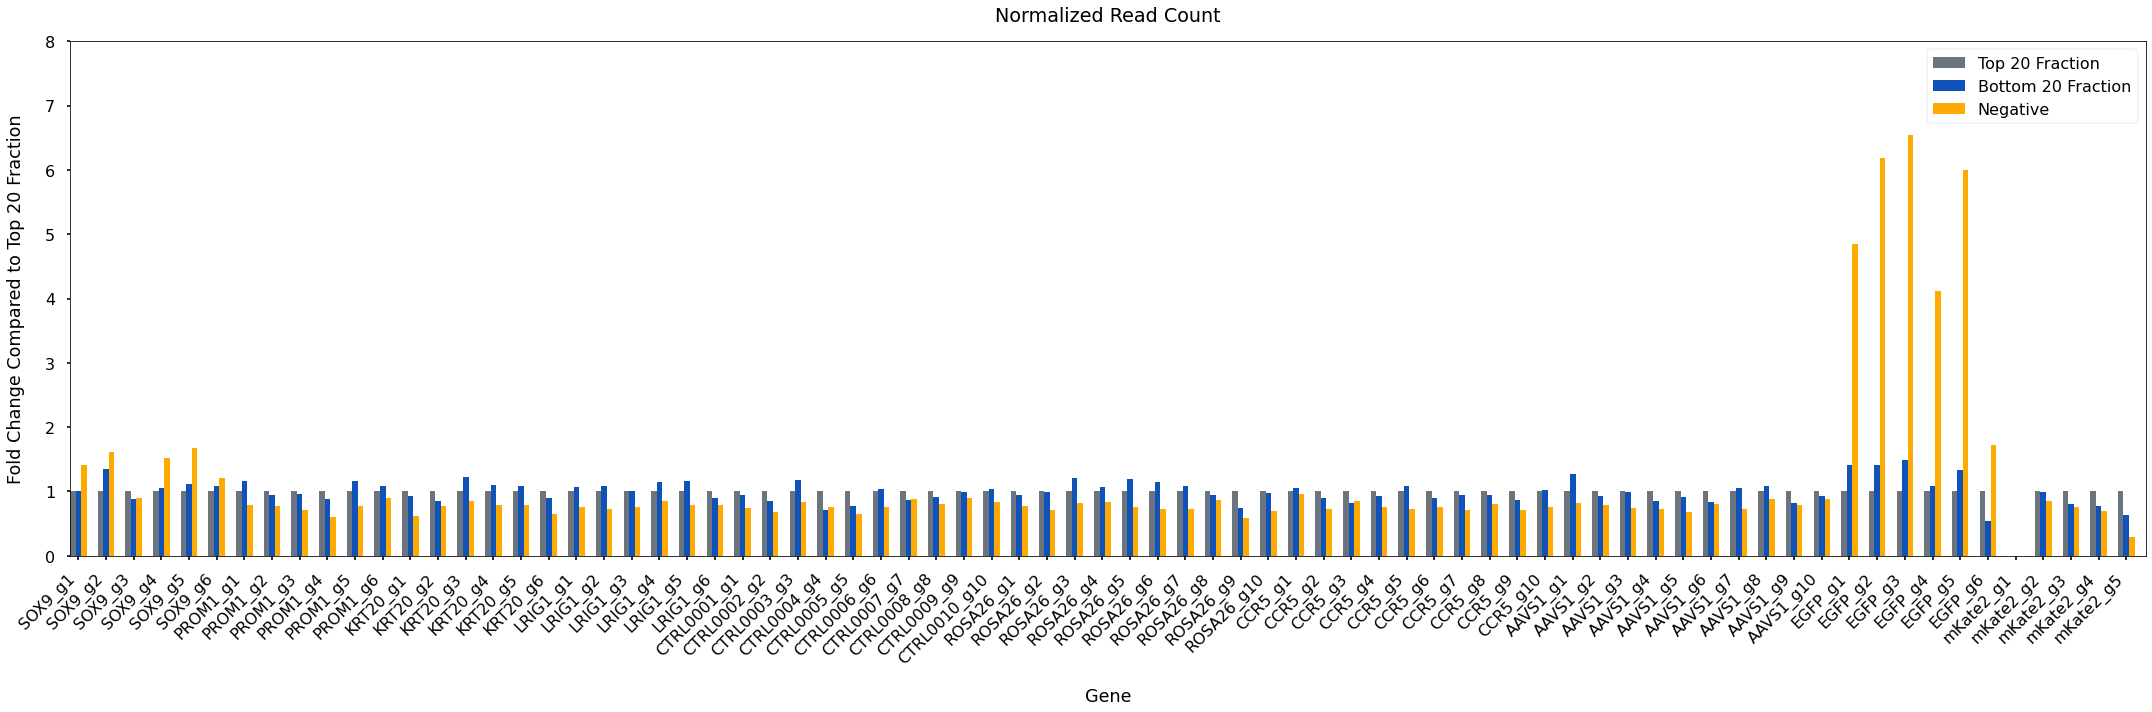

In [30]:
fold_change_graph(df, population="3")

# Heat Map of Fold Changes 

In [31]:
heatmap_df = pd.concat([population_fold_change_1,population_fold_change_2,population_fold_change_3])
heatmap_df.dropna(axis=1, how='all', inplace=True)
del heatmap_df['mKate2_g5']
heatmap_df

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,AAVS1_g10,EGFP_g1,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g2,mKate2_g3,mKate2_g4
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
S2,1.464073,1.288342,1.378447,1.509157,1.543225,1.548730,0.942262,0.993776,0.882420,0.916891,...,1.077949,1.746554,1.856856,1.270521,2.090209,2.185965,1.306021,0.895647,1.330165,0.922010
S3,1.889127,2.417600,1.629794,1.648511,1.719123,1.286671,0.751317,0.719374,0.660082,0.848604,...,0.825525,6.802927,6.108291,3.122755,5.239210,6.535396,1.543118,0.747304,1.064488,0.936770
S5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
S6,0.802567,1.030973,0.825934,0.859366,0.759387,0.845948,1.074925,1.046253,0.963240,0.982833,...,1.618644,1.097293,1.032960,0.925046,0.764047,1.186404,1.730081,0.837904,1.344999,0.909984
S7,0.880217,0.763668,0.789509,1.009833,0.826004,0.835146,0.945455,0.983898,0.698166,0.877108,...,1.033862,0.930405,0.808580,1.291240,0.774072,1.411749,4.794569,0.902264,0.957959,1.223634
S9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
S10,1.008101,1.348140,0.879820,1.046133,1.119770,1.082052,1.164044,0.940238,0.957131,0.875509,...,0.934612,1.417030,1.403430,1.484232,1.089037,1.326144,0.538033,0.985268,0.796538,0.770657
S11,1.403521,1.615788,0.901328,1.519437,1.667686,1.210221,0.786908,0.775634,0.714644,0.606528,...,0.887889,4.843338,6.182889,6.537059,4.118223,5.999203,1.718322,0.853657,0.763207,0.687816


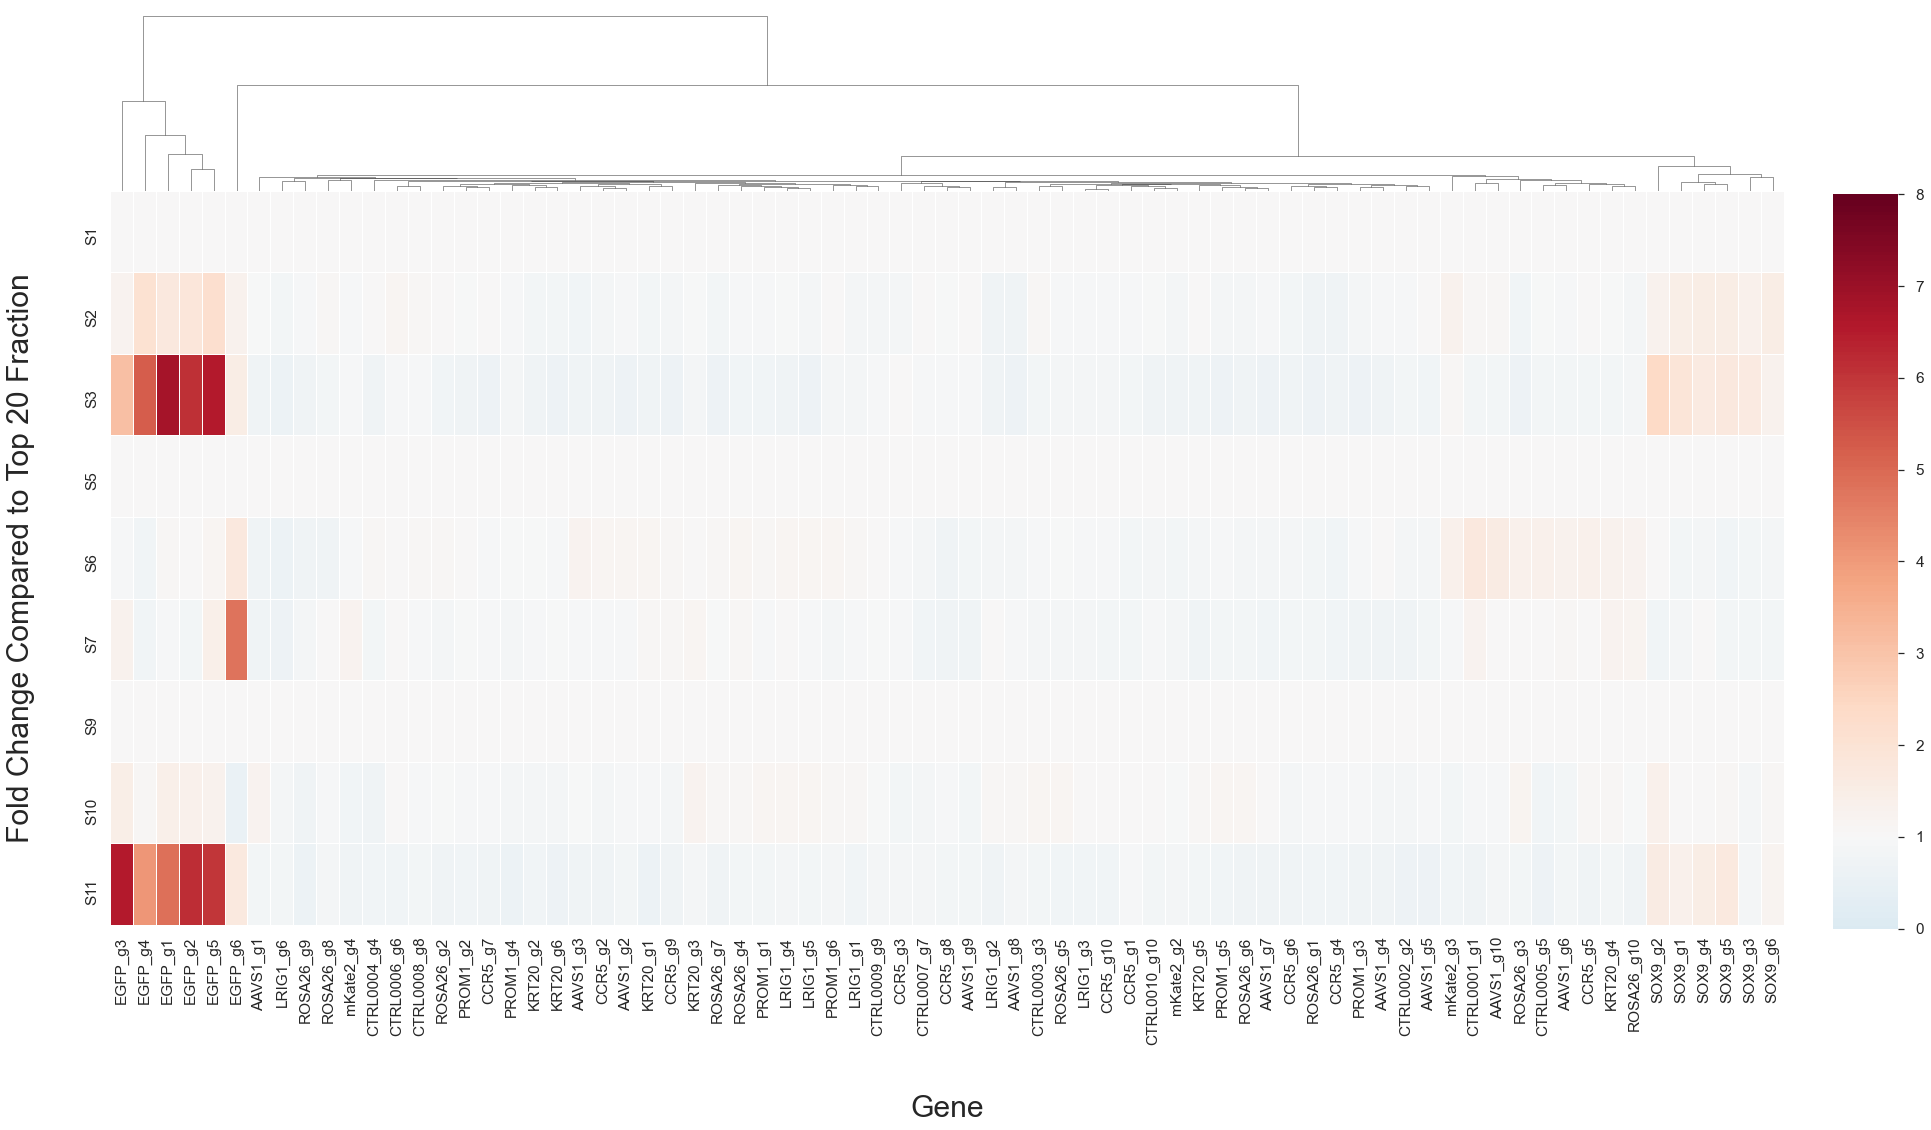

In [32]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(heatmap_df, 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         vmin=0,
                         vmax=8,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Gene", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

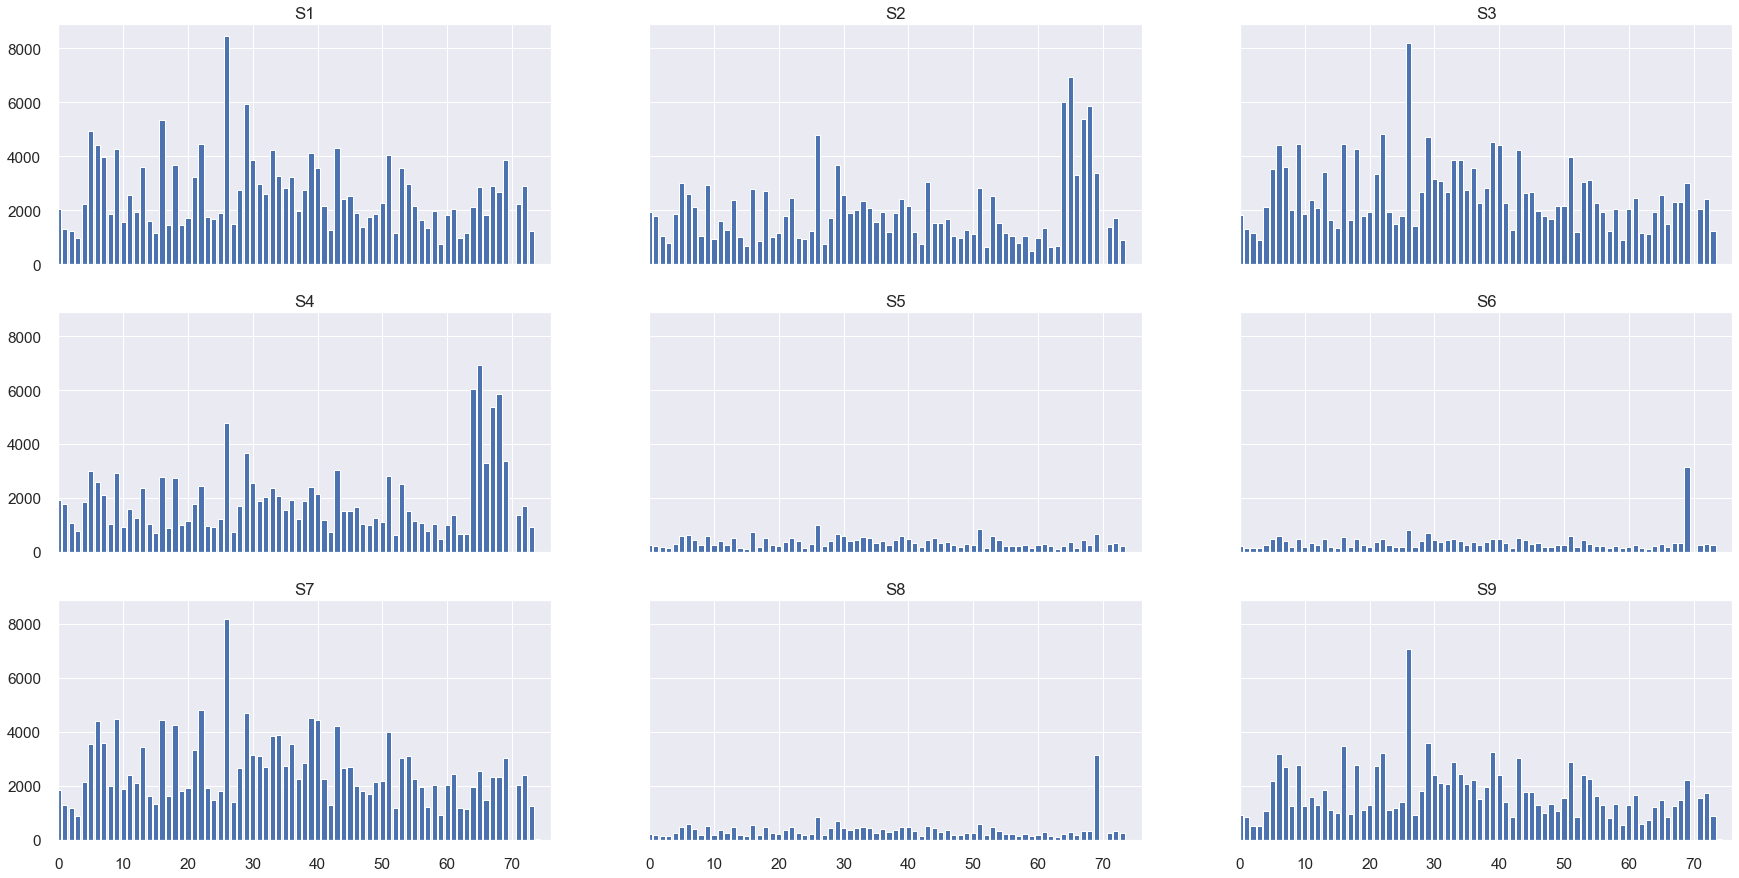

In [107]:
fig, ax = plt.subplots(3, 3, figsize=(30, 15), sharex=True, sharey=True)

n_cols = sum_df.index[:9]

for i in range(3):
    for j in range(3):
        
        if i == 0:
            title = "S" + str(j+1)
        if i == 1:
            title = "S" + str(j+4)
        if i == 2:
            title = "S" + str(j+7)
        ax[i,j].bar(ind, sum_df.iloc[(i+1)*(j+1), :])
        ax[i,j].set_xlim(0, sum_df.shape[1])
        ax[i,j].set_title(title)
plt.show()

# Scatter Plot of Normalized Expression between Top 20 Frac and Negative with Histogram and Cumulative Distribution

In [30]:
scatter_df = population_1.T[(population_1.T != 0).all(1)].dropna()
scatter_df 

,S1,S2,S3,S4
SOX9_g1,0.749987,1.098036,1.416821,1.0
SOX9_g2,0.767566,0.988888,1.855668,1.0
SOX9_g3,0.746527,1.029047,1.216685,1.0
SOX9_g4,0.711363,1.073559,1.172690,1.0
SOX9_g5,0.674045,1.040204,1.158767,1.0
...,...,...,...,...
EGFP_g5,0.518334,1.133060,3.387519,1.0
EGFP_g6,0.969038,1.265584,1.495340,1.0
mKate2_g2,1.197259,1.072322,0.894717,1.0
mKate2_g3,0.893290,1.188224,0.950897,1.0


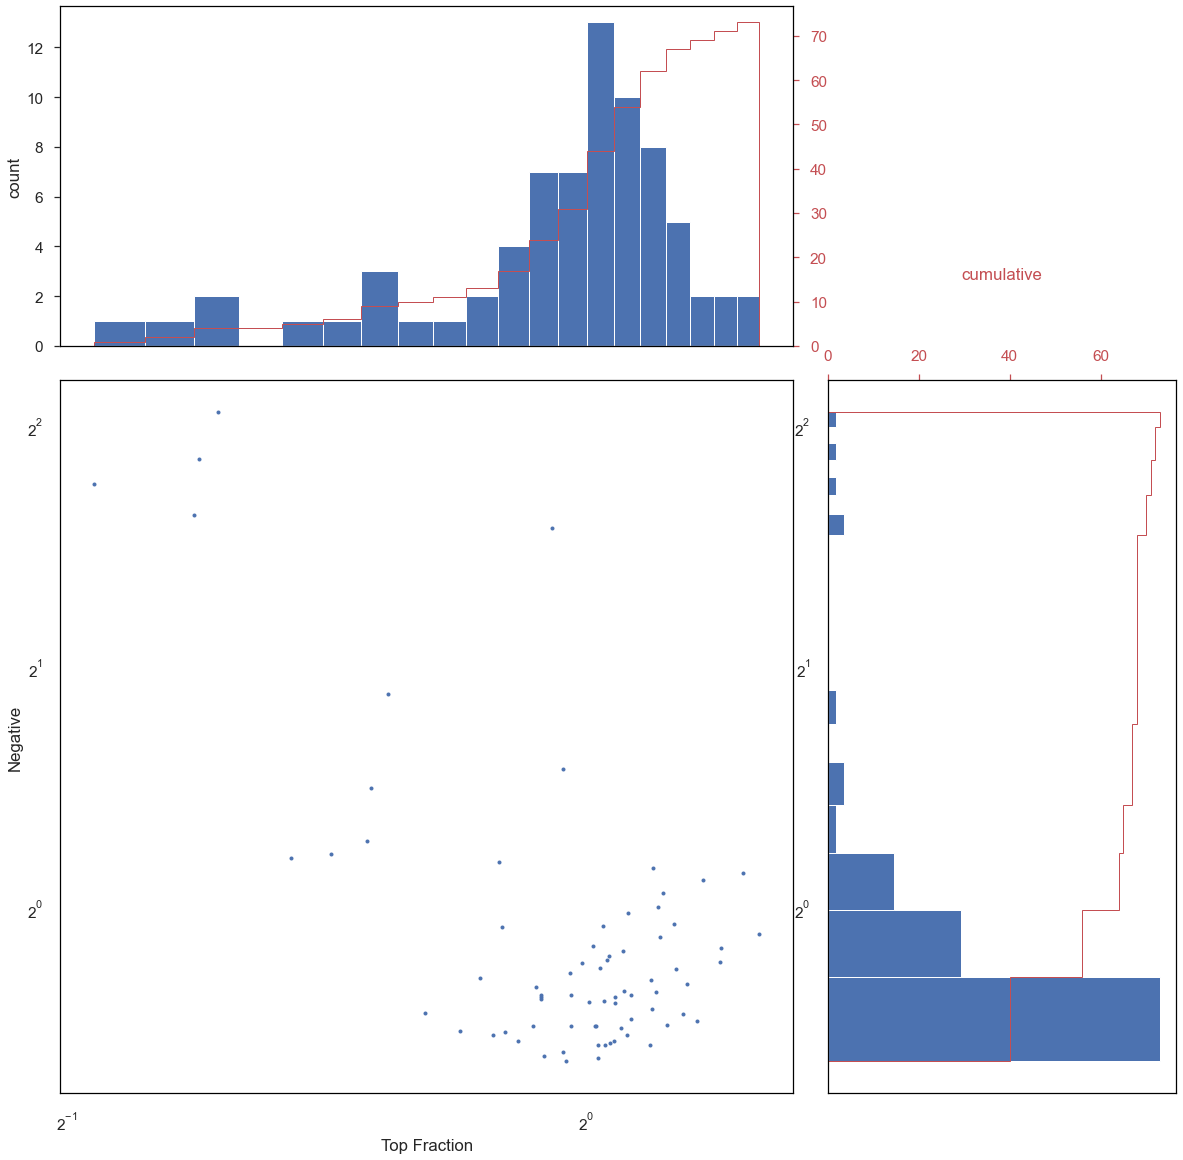

In [34]:
x = scatter_df ['S1']
y = scatter_df ['S3']

fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.1, hspace=0.1)

ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(x,y,marker='.')
ax_main.set(xlabel="Top Fraction", ylabel="Negative")

ax_xDist.hist(x,bins=20,align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=20,cumulative=True,histtype='step',color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('cumulative',color='r')

ax_yDist.hist(y,bins=20,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=20,cumulative=True,histtype='step',color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r', labelpad=70)

ax_main.set_xscale('log', basex=2)
ax_main.set_yscale('log', basey=2)
ax_main.set_facecolor("white")
ax_xDist.set_facecolor("white")
ax_yDist.set_facecolor("white")

ax_main.spines['left'].set_color('black')
ax_main.spines['right'].set_color('black')
ax_main.spines['top'].set_color('black')
ax_main.spines['bottom'].set_color('black')

ax_xCumDist.spines['left'].set_color('black')
ax_xCumDist.spines['right'].set_color('black')
ax_xCumDist.spines['top'].set_color('black')
ax_xCumDist.spines['bottom'].set_color('black')

ax_yCumDist.spines['left'].set_color('black')
ax_yCumDist.spines['right'].set_color('black')
ax_yCumDist.spines['top'].set_color('black')
ax_yCumDist.spines['bottom'].set_color('black')

ax_xDist.axes.get_xaxis().set_visible(False)
ax_yDist.axes.get_xaxis().set_visible(False)

ax_xCumDist.grid(b=None)
ax_yCumDist.grid(b=None)

plt.show()

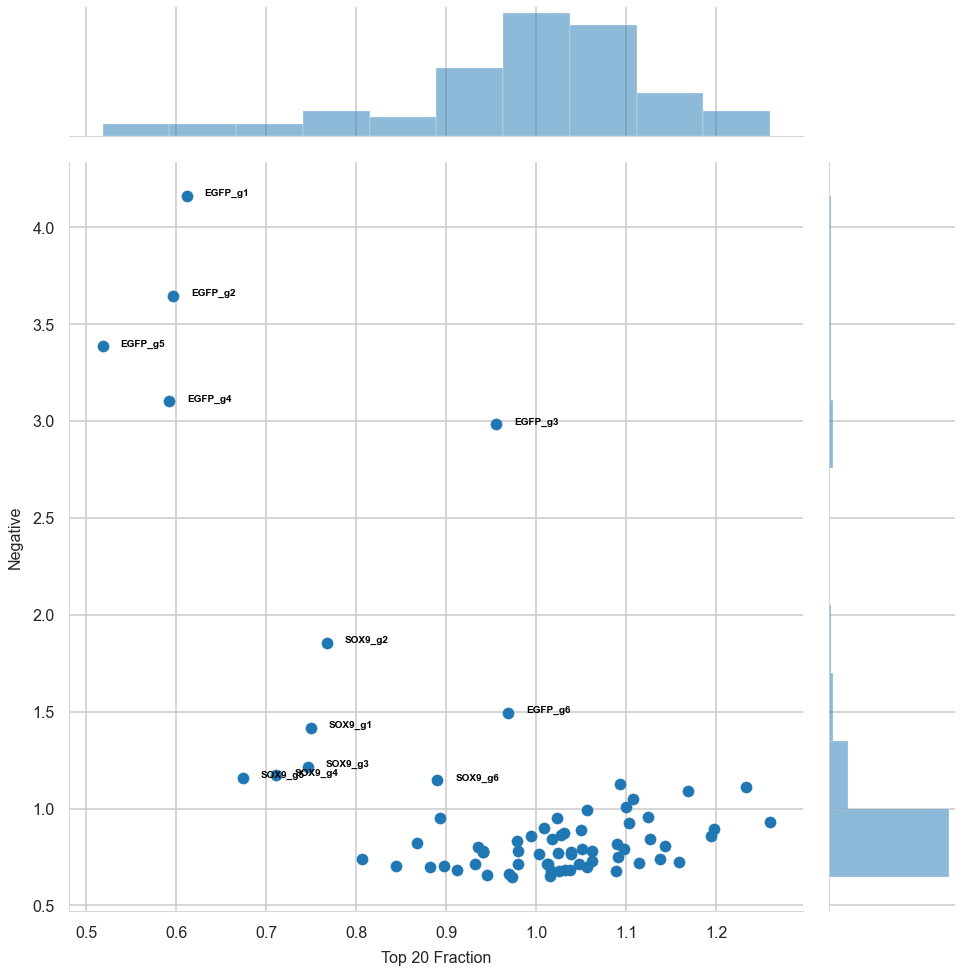

In [32]:
x = scatter_df['S1']
y = scatter_df['S3']

sns.set_style("whitegrid")
p = sns.JointGrid(
    x = scatter_df['S1'],
    y = scatter_df['S3']
    )

p = p.plot_joint(
    plt.scatter
    )

p.ax_marg_x.hist(
    scatter_df['S1'],
    alpha = 0.5
    )

p.ax_marg_y.hist(
    scatter_df['S3'],
    orientation = 'horizontal',
    alpha = 0.5
    )

for line in list(range(0,6)) + list(range(64,70)):
     plt.text(scatter_df.S1[line]+0.02, scatter_df.S3[line], scatter_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
p.fig.set_size_inches(15,15)
p.set_axis_labels('Top 20 Fraction', 'Negative', fontsize=16, labelpad=10)
plt.show()


# Graphs for each Normalization Step

In [ ]:
def step_graph()
x = scatter_df['S1']
y = scatter_df['S3']

sns.set_style("whitegrid")
p = sns.JointGrid(
    x = scatter_df['S1'],
    y = scatter_df['S3']
    )

p = p.plot_joint(
    plt.scatter
    )

p.ax_marg_x.hist(
    scatter_df['S1'],
    alpha = 0.5
    )

p.ax_marg_y.hist(
    scatter_df['S3'],
    orientation = 'horizontal',
    alpha = 0.5
    )

for line in list(range(0,6)) + list(range(64,70)):
     plt.text(scatter_df.S1[line]+0.02, scatter_df.S3[line], scatter_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
p.fig.set_size_inches(15,15)
p.set_axis_labels('Top 20 Fraction', 'Negative', fontsize=16, labelpad=10)



In [131]:
#Total read normalization
total_read_normalization = total_read_norm(sum_df)
#Library pool normalization
library_pool_normalization = library_pool_norm(total_read_normalization)
#Population level normalization
population_1 = pop_level_norm(library_pool_normalization.iloc[:4, :])
population_2 = pop_level_norm(library_pool_normalization.iloc[4:8, :])
population_3 = pop_level_norm(library_pool_normalization.iloc[8:12, :])
#Population fold change
population_fold_change_1 = top_frac_norm(population_1)
population_fold_change_2 = top_frac_norm(population_2)
population_fold_change_3 = top_frac_norm(population_3)


In [156]:
def step_graph(x, y):

    x.dropna(inplace=True)
    y.dropna(inplace=True)
    
    sns.set_style("whitegrid")
    p = sns.JointGrid(
        x = x,
        y = y
        )

    p = p.plot_joint(
        plt.scatter
        )

    p.ax_marg_x.hist(
        x,
        alpha = 0.5
        )

    p.ax_marg_y.hist(
        y,
        orientation = 'horizontal',
        alpha = 0.5
        )

    for line in list(range(0,6)) + list(range(64,70)):
         plt.text(x[line]+0.0001, y[line]+0.0001, x.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

    plt.plot([0, max([x.max(), y.max()])], [0, max([x.max(), y.max()])], linewidth=2, color='orange')
    
    p.set_axis_labels('Top 20 Fraction', 'Negative', fontsize=16, labelpad=10)
    plt.gca().set_aspect('equal')
    p.fig.set_size_inches(15,15)
    plt.xlim([0, max([x.max(), y.max()])])
    plt.ylim([0, max([x.max(), y.max()])])
    plt.show()

## Population 1

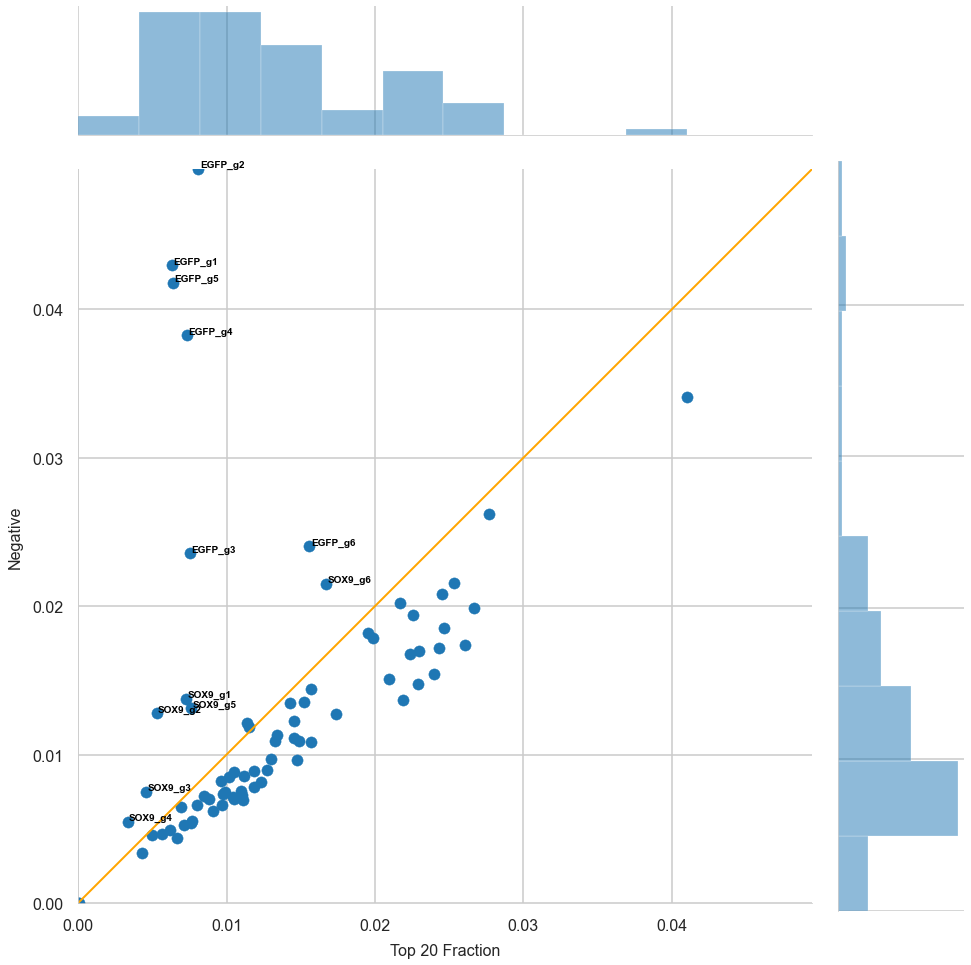

In [157]:
step_graph(x = total_read_normalization.iloc[0, :],
           y = total_read_normalization.iloc[2, :])

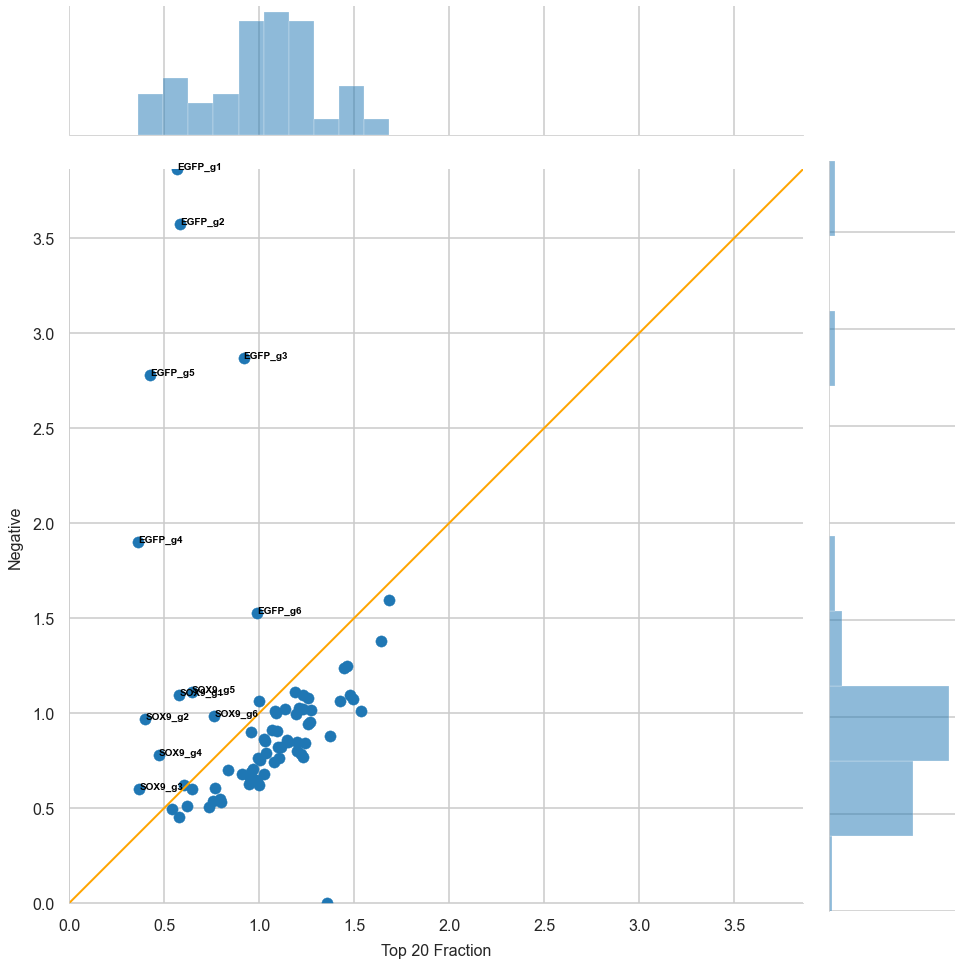

In [158]:
step_graph(x = library_pool_normalization.iloc[0, :],
           y = library_pool_normalization.iloc[2, :])

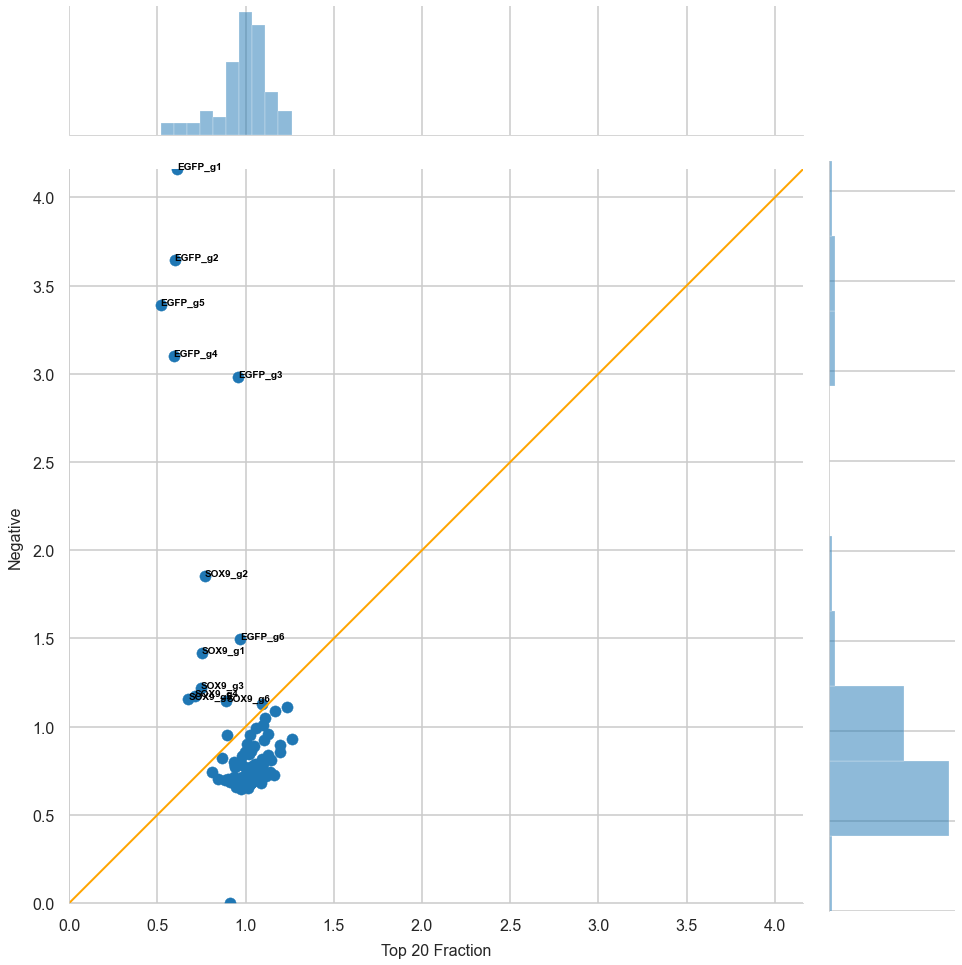

In [159]:
step_graph(x = population_1.iloc[0, :],
           y = population_1.iloc[2, :])

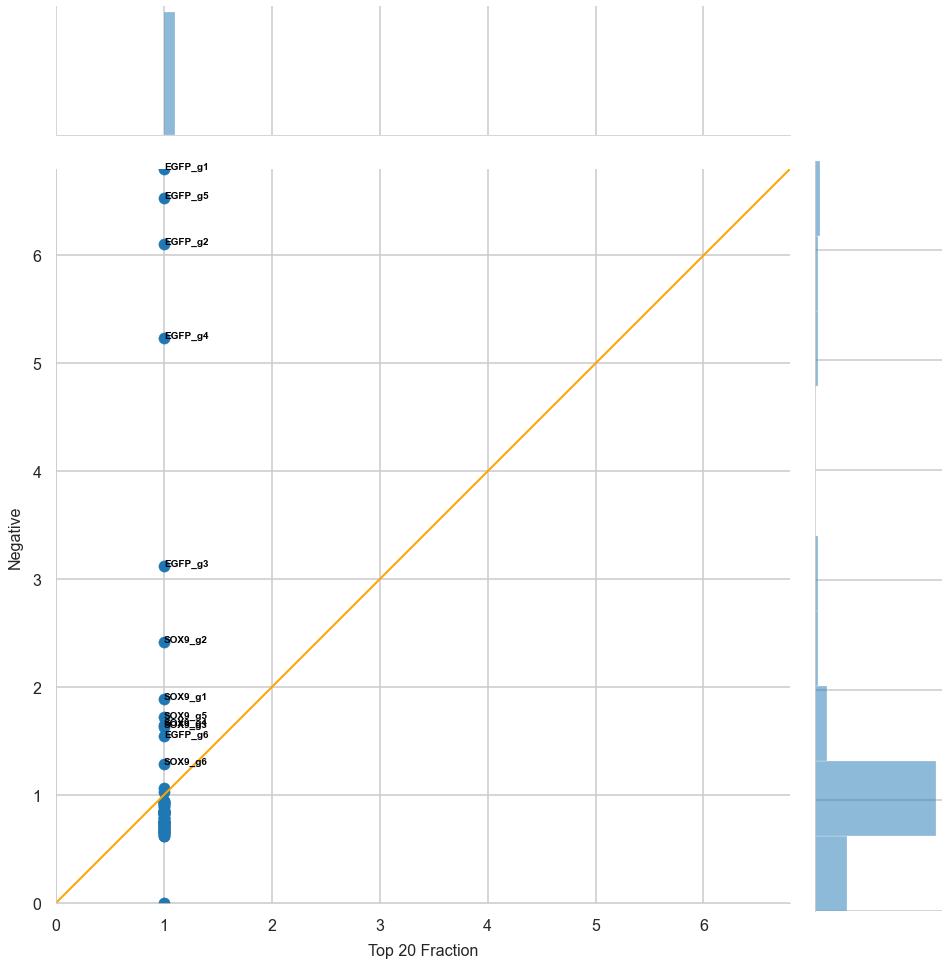

In [160]:
step_graph(x = population_fold_change_1.iloc[0, :],
           y = population_fold_change_1.iloc[2, :])

## Population 2

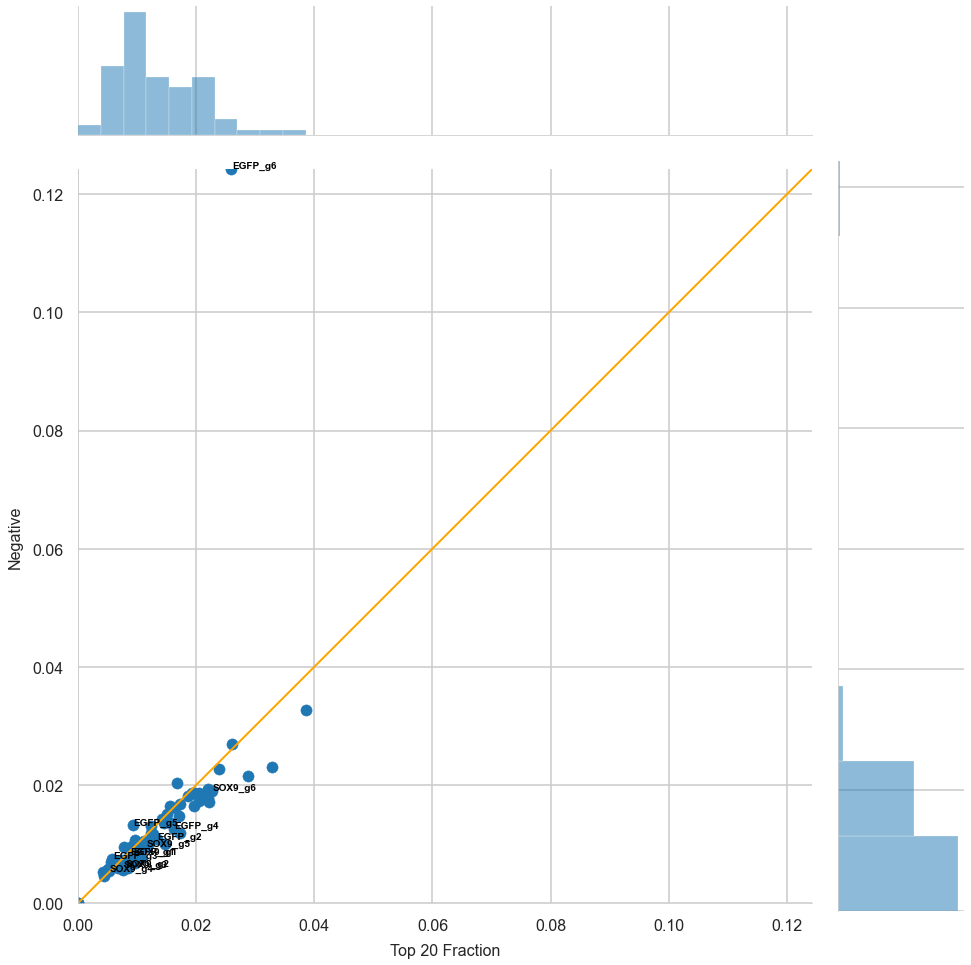

In [167]:
step_graph(x = total_read_normalization.iloc[4, :],
           y = total_read_normalization.iloc[6, :])

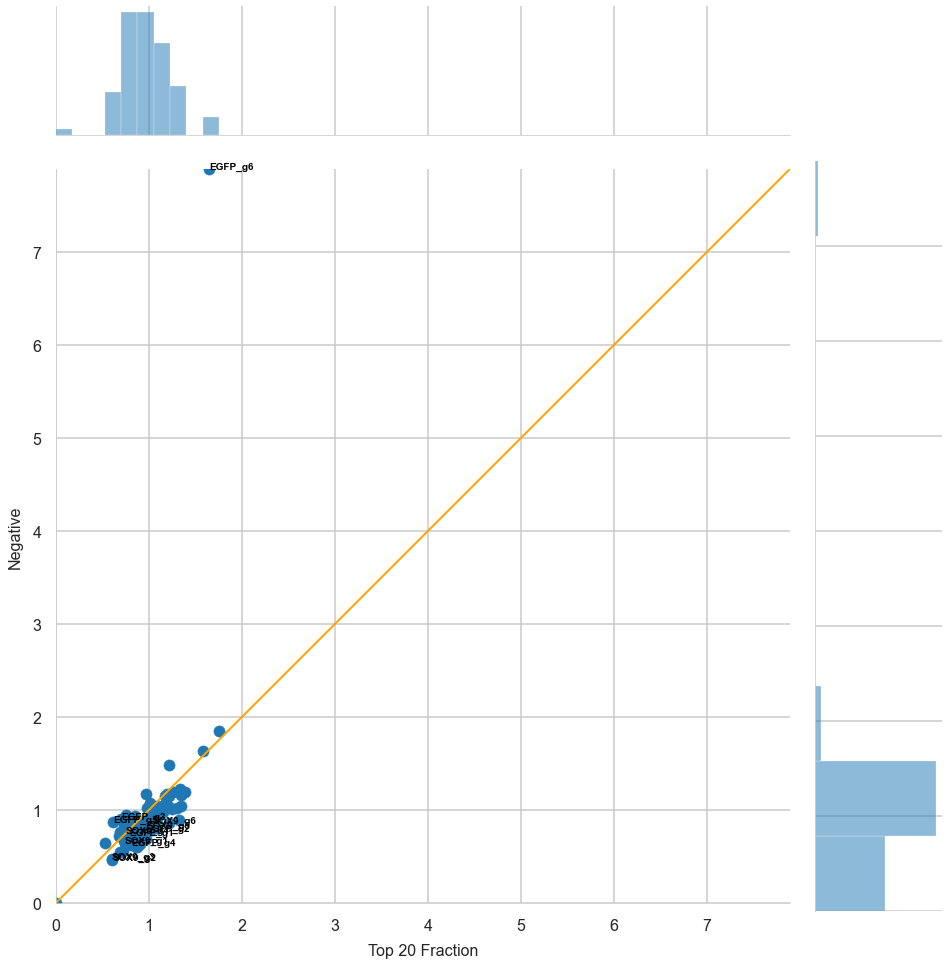

In [168]:
step_graph(x = library_pool_normalization.iloc[4, :],
           y = library_pool_normalization.iloc[6, :])

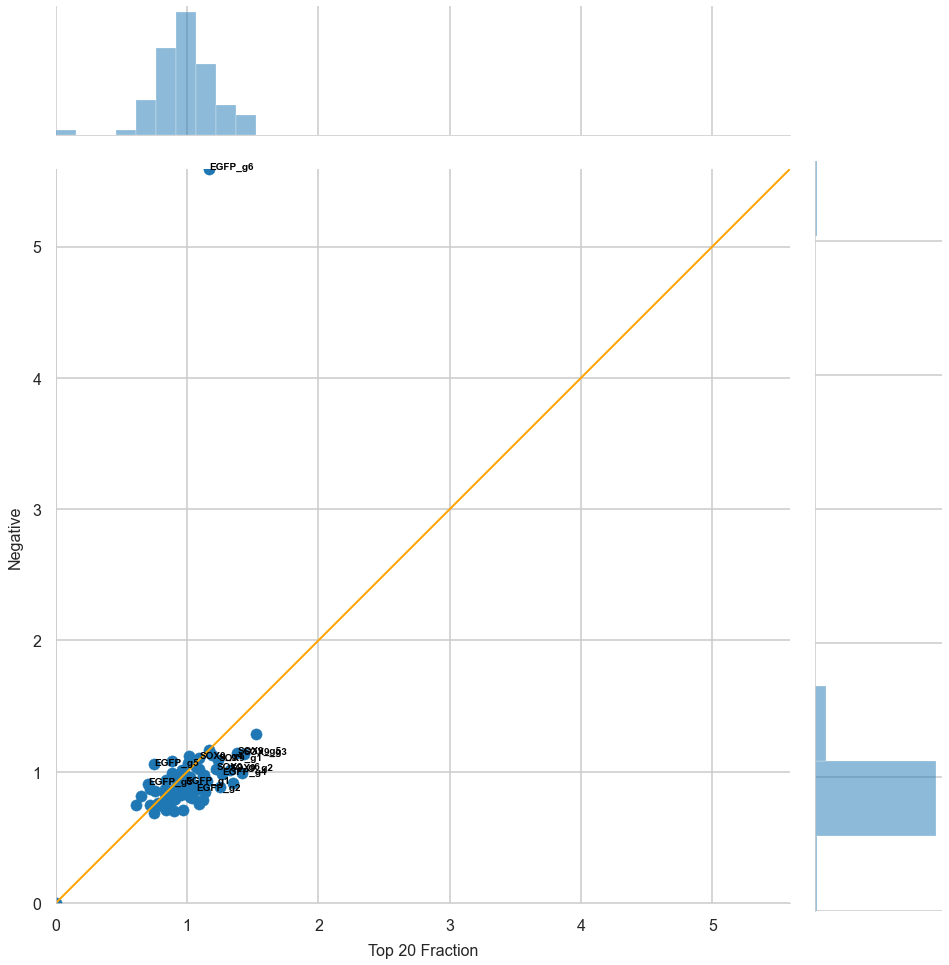

In [169]:
step_graph(x = population_2.iloc[0, :],
           y = population_2.iloc[2, :])

## Population 3

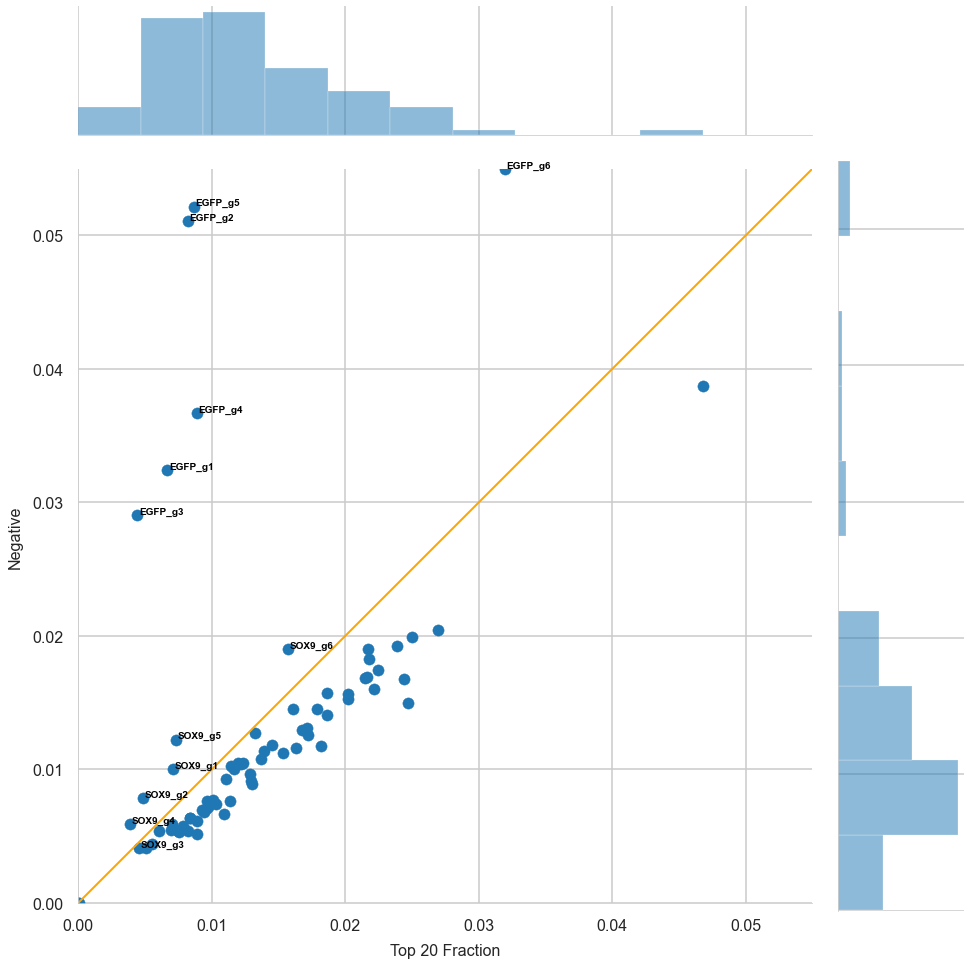

In [177]:
step_graph(x = total_read_normalization.iloc[8, :],
           y = total_read_normalization.iloc[10, :])

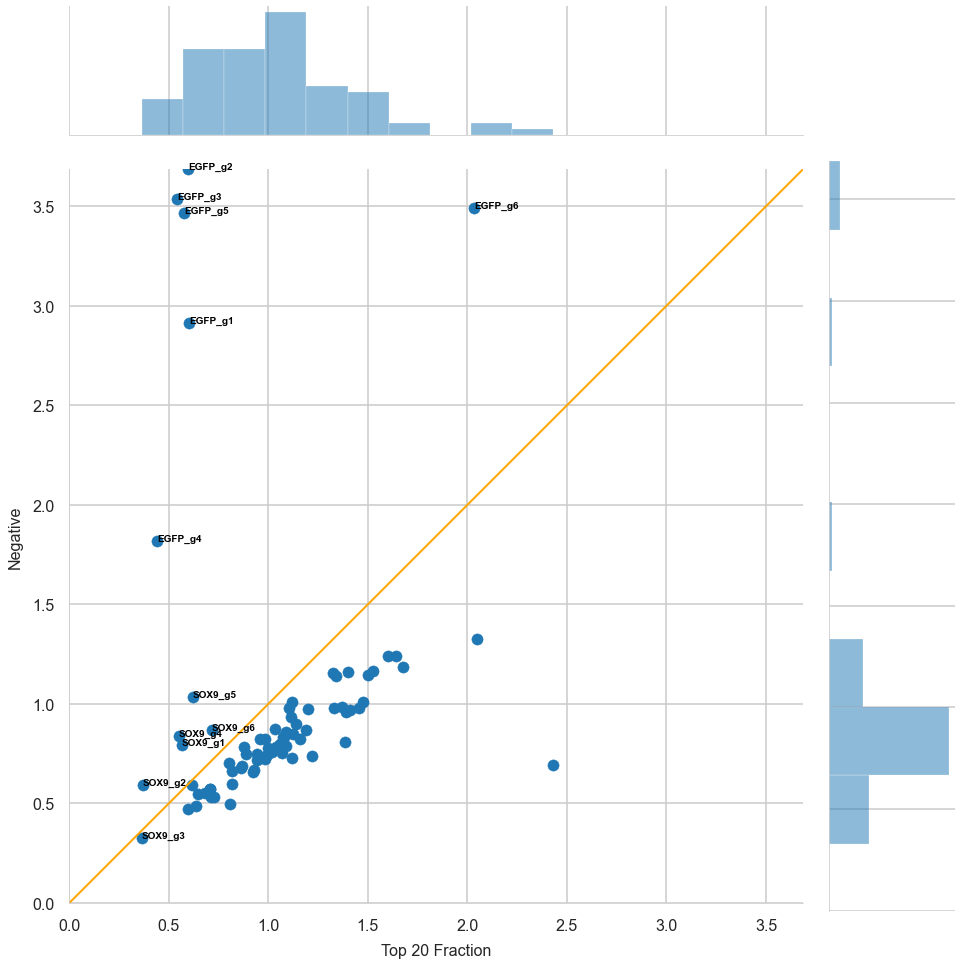

In [178]:
step_graph(x = library_pool_normalization.iloc[8, :],
           y = library_pool_normalization.iloc[10, :])

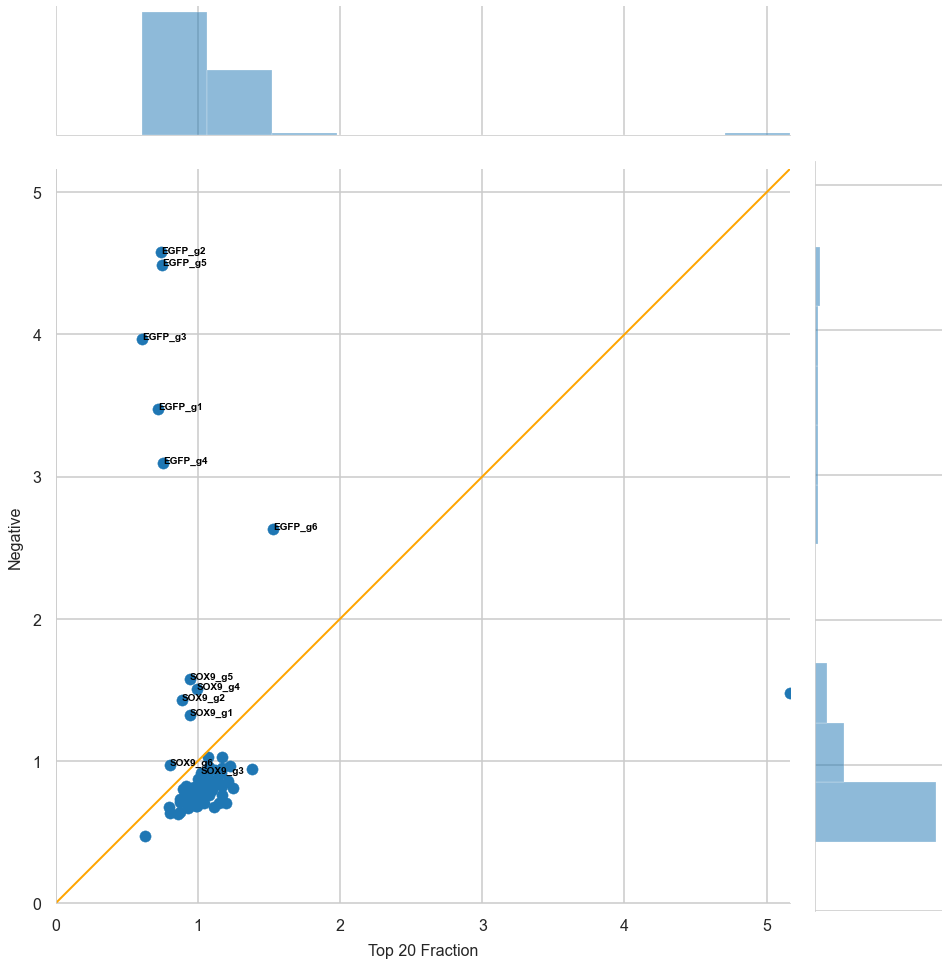

In [179]:
step_graph(x = population_3.iloc[0, :],
           y = population_3.iloc[2, :])

# K-Means Cluster 

In [115]:
from sklearn.cluster import KMeans

In [121]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scatter_df.iloc[:, [0,2]])
    Sum_of_squared_distances.append(km.inertia_)


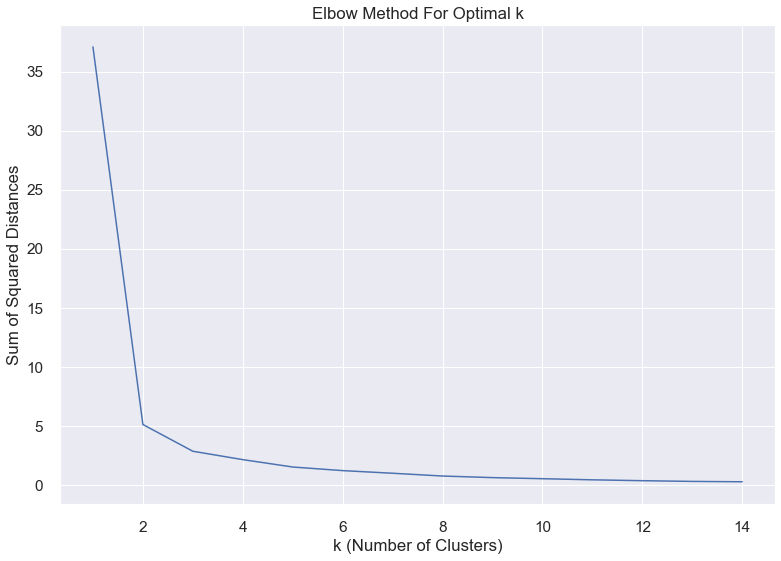

In [135]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [136]:
def kmeans_cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scatter_df.iloc[:, [0,2]])
    y_kmeans = kmeans.predict(scatter_df.iloc[:, [0,2]])

    plt.scatter(scatter_df.iloc[:, 0], scatter_df.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    
    for line in list(range(0,6)) + list(range(64,70)):
         plt.text(scatter_df.S1[line]+0.02, scatter_df.S3[line], scatter_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        

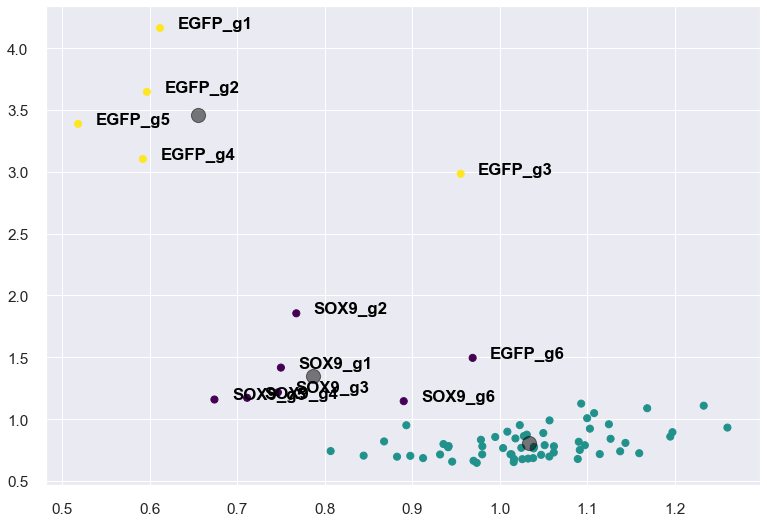

In [137]:
kmeans_cluster(n_clusters=3)

# MA plot 

#### Visualize and identify gene expression changes from two different conditions (eg. normal vs. treated) in terms of log fold change (M) on Y-axis and log of the mean of normalized expression counts of normal and treated samples (A) on X-axis

Genes with similar expression values in both normal and treated samples will cluster around M=0 value i.e genes expressed with no significant differences in between treatments

Points away from M=0 line indicate genes with significant expression, For example, a gene is upregulated and downregulated if the point is above and below M=0 line respectively

### Sample Dataset from Package

In [36]:
ma_sample = analys.get_data('ma').data
ma_sample.head()

,GeneNames,value1,value2,log2FC,p-value
0,LOC_Os09g01000.1,8862,32767,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,1099,117,3.231611,1.050000e-55
2,LOC_Os12g42884.2,797,88,3.179004,2.590000e-54
3,LOC_Os03g16920.1,274,7,5.290677,4.690000e-54
4,LOC_Os05g47540.4,308,18,4.096862,2.190000e-54


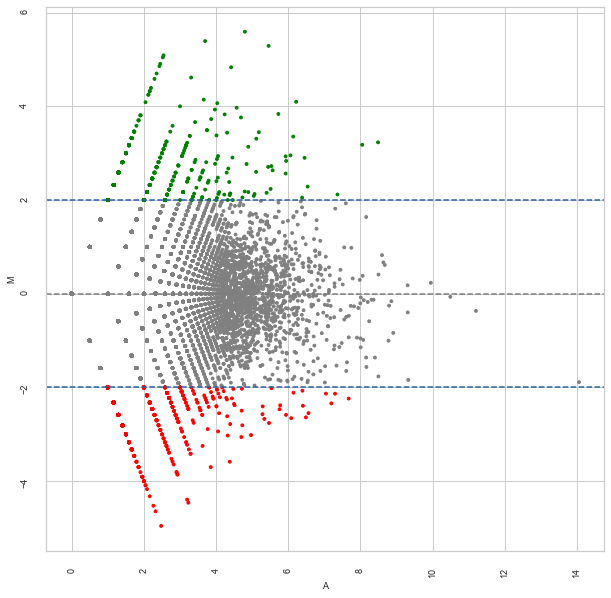

In [37]:
visuz.gene_exp.ma(df=ma_sample, lfc='log2FC', ct_count='value1', st_count='value2', show=True,fclines=True, lfc_thr=2, dim=(10,10))

### No Normalization

In [38]:
test_plot = pd.DataFrame(columns=["value1", "value2"])
test_plot["value1"] = sum_df.iloc[0, :]
test_plot["value2"] = sum_df.iloc[2, :]
test_plot = test_plot[(test_plot != 0).all(1)].dropna()

test_plot["log2FC"] = [math.log(x, 2) for x in test_plot["value2"]/test_plot["value1"]]
test_plot["GeneNames"] = test_plot.index
test_plot.reset_index(inplace=True)
test_plot.drop([70], inplace=True)
test_plot

,index,value1,value2,log2FC,GeneNames
0,SOX9_g1,753.0,1929.0,1.357131,SOX9_g1
1,SOX9_g2,546.0,1790.0,1.712987,SOX9_g2
2,SOX9_g3,476.0,1052.0,1.144101,SOX9_g3
3,SOX9_g4,344.0,769.0,1.160575,SOX9_g4
4,SOX9_g5,788.0,1837.0,1.221084,SOX9_g5
...,...,...,...,...,...
68,EGFP_g5,661.0,5858.0,3.147686,EGFP_g5
69,EGFP_g6,1610.0,3369.0,1.065260,EGFP_g6
71,mKate2_g2,1345.0,1363.0,0.019179,mKate2_g2
72,mKate2_g3,1177.0,1699.0,0.529572,mKate2_g3


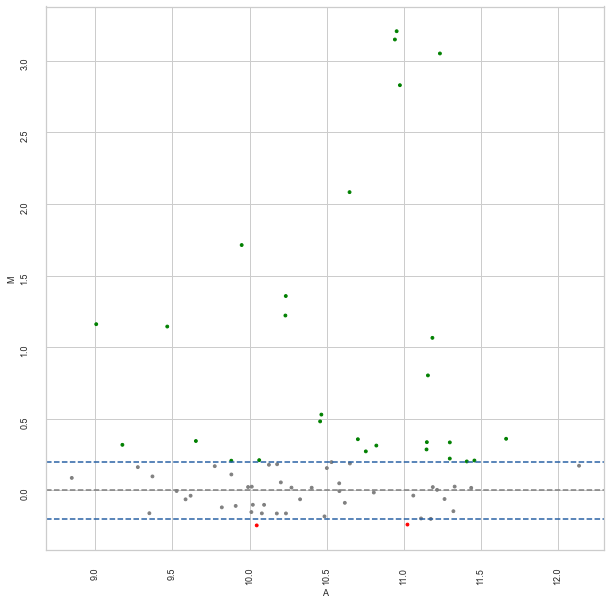

In [39]:
visuz.gene_exp.ma(df=test_plot, lfc='log2FC', ct_count='value1', st_count='value2', show=True ,fclines=True, lfc_thr=0.2, dim=(10,10))

### Normalized up to Population Level Normalization

In [40]:
ma_plot = pd.DataFrame(columns=["value1", "value2"])
ma_plot["value1"] = population_1.iloc[0, :]
ma_plot["value2"] = population_1.iloc[2, :]
ma_plot = ma_plot[(ma_plot != 0).all(1)].dropna()
ma_plot["log2FC"] = [math.log(x, 2) for x in ma_plot["value2"]/ma_plot["value1"]     ]
ma_plot = ma_plot[(ma_plot != 0).all(1)].dropna()
ma_plot["GeneNames"] = ma_plot.index
ma_plot.reset_index(inplace=True)
ma_plot

,index,value1,value2,log2FC,GeneNames
0,SOX9_g1,0.749987,1.416821,0.917720,SOX9_g1
1,SOX9_g2,0.767566,1.855668,1.273575,SOX9_g2
2,SOX9_g3,0.746527,1.216685,0.704690,SOX9_g3
3,SOX9_g4,0.711363,1.172690,0.721164,SOX9_g4
4,SOX9_g5,0.674045,1.158767,0.781673,SOX9_g5
...,...,...,...,...,...
68,EGFP_g5,0.518334,3.387519,2.708275,EGFP_g5
69,EGFP_g6,0.969038,1.495340,0.625848,EGFP_g6
70,mKate2_g2,1.197259,0.894717,-0.420232,mKate2_g2
71,mKate2_g3,0.893290,0.950897,0.090160,mKate2_g3


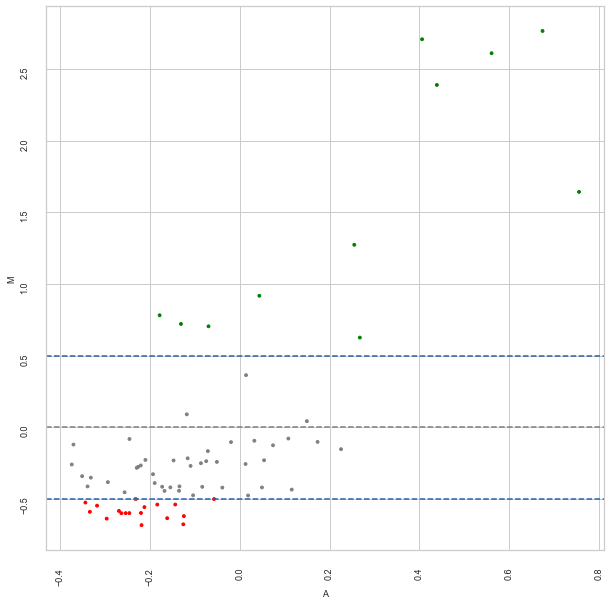

In [41]:
visuz.gene_exp.ma(df=ma_plot, lfc='log2FC', ct_count='value1', st_count='value2', show=True,fclines=True, lfc_thr=0.5, dim=(10,10))

### Normalized to Top Fraction Data

In [42]:
ma_plot = pd.DataFrame(columns=["value1", "value2"])
ma_plot["value1"] = normalization(df, population="1").T["S1"]
ma_plot["value2"] = normalization(df, population="1").T["S3"]
ma_plot = ma_plot[(ma_plot != 0).all(1)].dropna()
ma_plot["log2FC"] = [math.log(x, 2) for x in ma_plot["value2"]]
ma_plot["GeneNames"] = ma_plot.index
ma_plot.reset_index(inplace=True)
ma_plot

,index,value1,value2,log2FC,GeneNames
0,SOX9_g1,1.0,1.889127,0.917720,SOX9_g1
1,SOX9_g2,1.0,2.417600,1.273575,SOX9_g2
2,SOX9_g3,1.0,1.629794,0.704690,SOX9_g3
3,SOX9_g4,1.0,1.648511,0.721164,SOX9_g4
4,SOX9_g5,1.0,1.719123,0.781673,SOX9_g5
...,...,...,...,...,...
68,EGFP_g5,1.0,6.535396,2.708275,EGFP_g5
69,EGFP_g6,1.0,1.543118,0.625848,EGFP_g6
70,mKate2_g2,1.0,0.747304,-0.420232,mKate2_g2
71,mKate2_g3,1.0,1.064488,0.090160,mKate2_g3


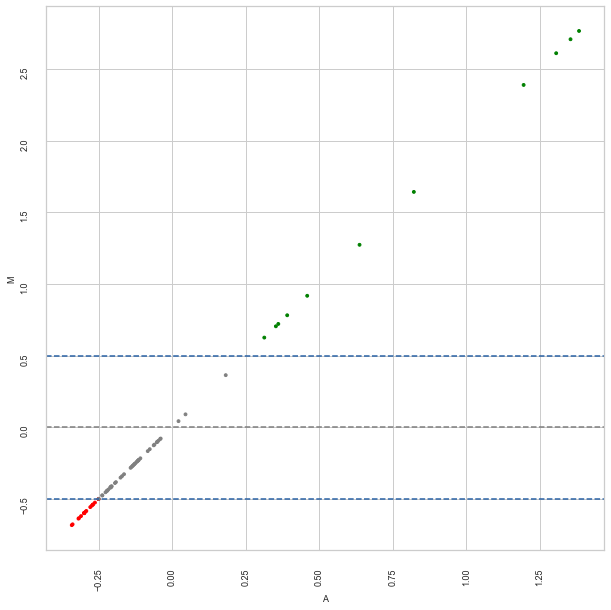

In [43]:
visuz.gene_exp.ma(df=ma_plot, lfc='log2FC', ct_count='value1', st_count='value2', show=True,fclines=True, lfc_thr=0.5, dim=(10,10))

# Volcano Plot comparing Top 20 Fraction and Negative within Population 1

Volcano plots are commonly used to display the results of RNA-seq or other omics experiments. A volcano plot is a type of scatterplot that shows statistical significance (P value) versus magnitude of change (fold change). In a volcano plot, the most upregulated genes are towards the right, the most downregulated genes are towards the left, and the most statistically significant genes are towards the top.

### Sample Dataset from Package

In [44]:
v_sample = analys.get_data('volcano').data
v_sample.head()

,GeneNames,log2FC,p-value
0,LOC_Os09g01000.1,-1.886539,1.250000e-55
1,LOC_Os12g42876.1,3.231611,1.050000e-55
2,LOC_Os12g42884.2,3.179004,2.590000e-54
3,LOC_Os03g16920.1,5.290677,4.690000e-54
4,LOC_Os05g47540.4,4.096862,2.190000e-54


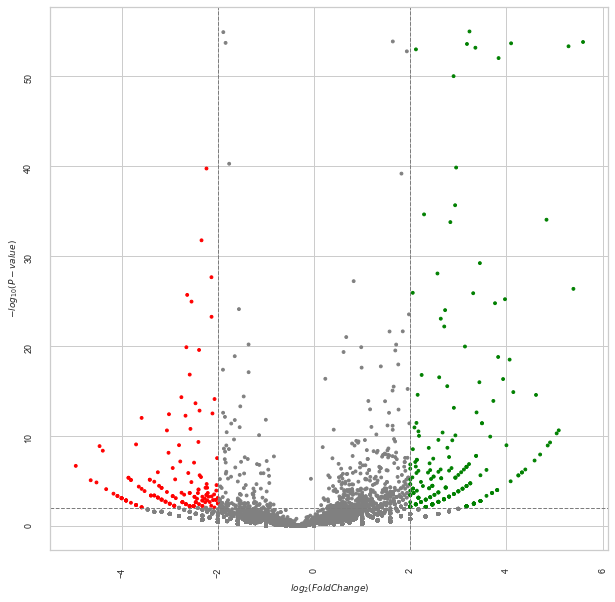

In [45]:
visuz.gene_exp.volcano(df=v_sample, lfc='log2FC', pv='p-value', show=True, dim=(10,10),lfc_thr=2, pv_thr=0.01, sign_line=True)

### Comparing Top Frac 20 to Negative 

In [46]:
v_plot = pd.DataFrame(columns=["negative", "top_frac"])
v_plot["top_frac"] = (population_1.iloc[0, :] + population_2.iloc[0, :] + population_3.iloc[0, :]) / 3
v_plot["negative"] = (population_1.iloc[2, :] + population_2.iloc[2, :] + population_3.iloc[2, :]) / 3
v_plot.fillna(0, inplace=True)
v_plot.replace(np.inf, 0, inplace=True)
v_plot = v_plot[(v_plot != 0).all(1)].dropna()
v_plot["log2FC"] = [math.log(x, 2) for x in v_plot["negative"]/v_plot["top_frac"]]
v_plot["p-value"] = 0
for gene in v_plot.index:
    top_frac = [population_1.loc['S1',gene], population_2.loc['S5',gene], population_3.loc['S9',gene] ]
    negative = [population_1.loc['S3',gene], population_2.loc['S7',gene], population_3.loc['S11',gene] ]
    v_plot.loc[gene, "p-value"] = stats.ttest_rel(top_frac,negative)[1]
v_plot["GeneNames"] = v_plot.index
v_plot.reset_index(drop=True, inplace=True)
#remove kate_g5 outlier
v_plot = v_plot.iloc[:73, :]
v_plot


,negative,top_frac,log2FC,p-value,GeneNames
0,1.276547,0.976652,0.386330,0.335846,SOX9_g1
1,1.432757,0.992546,0.529589,0.393310,SOX9_g2
2,1.088515,1.065829,0.030386,0.930768,SOX9_g3
3,1.260179,0.931366,0.436209,0.175831,SOX9_g4
4,1.291451,0.999900,0.369138,0.392098,SOX9_g5
...,...,...,...,...,...
68,2.976762,0.671250,2.148821,0.154601,EGFP_g5
69,3.238932,1.221837,1.406466,0.238939,EGFP_g6
70,0.872277,1.053527,-0.272370,0.101863,mKate2_g2
71,0.889882,0.971336,-0.126356,0.482747,mKate2_g3


In [47]:
v_plot.describe()

,negative,top_frac,log2FC,p-value
count,73.000000,73.000000,73.000000,73.000000
mean,1.026892,0.999459,-0.077124,0.202582
std,0.571233,0.095452,0.597647,0.190282
min,0.679695,0.671250,-0.533831,0.000296
25%,0.787981,0.954475,-0.376299,0.058447
50%,0.835201,0.998080,-0.272166,0.160756
75%,0.920407,1.057697,-0.135783,0.267895
max,3.238932,1.221837,2.148821,0.930768


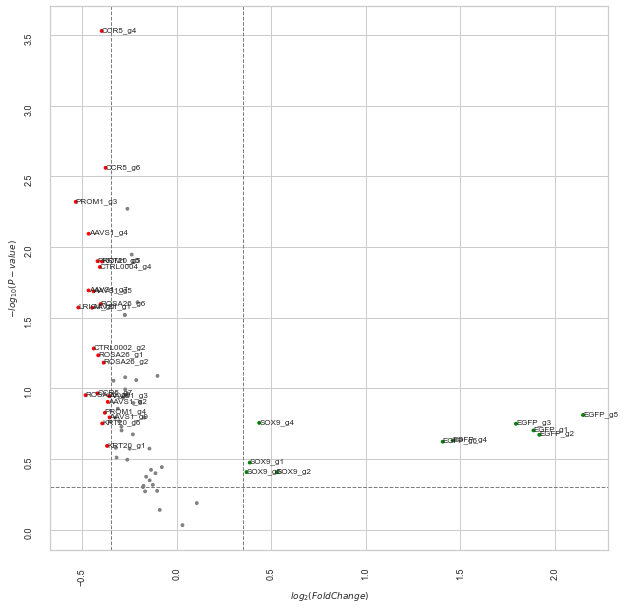

In [48]:
visuz.gene_exp.volcano(df=v_plot, lfc='log2FC', pv='p-value', show=True, dim=(10,10), lfc_thr=0.35, pv_thr=0.5,sign_line=True, geneid='GeneNames', genenames="deg")

# Volcano Plot with Anova One Way Statistic for 3-way Comparison of Mean Fold Change

In [49]:
v_plot = pd.DataFrame(columns=["negative", "top_frac"])
v_plot["top_frac"] = (population_1.iloc[0, :] + population_2.iloc[0, :] + population_3.iloc[0, :]) / 3
v_plot["negative"] = (population_1.iloc[2, :] + population_2.iloc[2, :] + population_3.iloc[2, :]) / 3
v_plot.fillna(0, inplace=True)
v_plot.replace(np.inf, 0, inplace=True)
v_plot = v_plot[(v_plot != 0).all(1)].dropna()
v_plot["log2FC"] = [math.log(x, 2) for x in v_plot["negative"]/v_plot["top_frac"]]
v_plot["p-value"] = 0
for gene in v_plot.index:
    top_frac = [population_1.loc['S1',gene], population_2.loc['S5',gene], population_3.loc['S9',gene] ]
    bottom_frac = [population_1.loc['S2',gene], population_2.loc['S6',gene], population_3.loc['S10',gene] ]
    negative = [population_1.loc['S3',gene], population_2.loc['S7',gene], population_3.loc['S11',gene] ]
    v_plot.loc[gene, "p-value"] = f_oneway(top_frac, bottom_frac, negative)[1]     
v_plot["GeneNames"] = v_plot.index
v_plot.reset_index(drop=True, inplace=True)

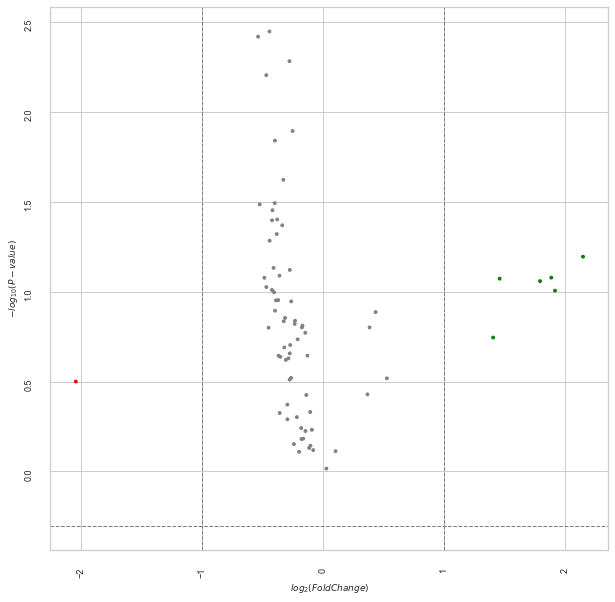

In [50]:
visuz.gene_exp.volcano(df=v_plot, lfc='log2FC', pv='p-value', show=True, dim=(10,10), lfc_thr=1, pv_thr=2,sign_line=True)

# Part 3: Additional Normalization Steps

In [51]:
vector_count = pd.read_excel(io = "MiniScreen01_normalized data.xlsx", sheet_name="total read normalization")["Vec"][:15]
vector_count.index = sum_df.index
vector_count

S1     118267.0
S2     204982.0
S3     168697.0
S4     214900.0
S5      31255.0
S6      13859.0
S7      37887.0
S8     188973.0
S9     177627.0
S10    141443.0
S11    183689.0
S12    150797.0
S13    182836.0
S14    151971.0
S15     95333.0
Name: Vec, dtype: float64

In [52]:
def vector_norm(sum_df):   
    vector_norm = sum_df.div(vector_count, axis=0)
    return vector_norm

In [53]:
def new_normalization(df, population):
    # 1. Sum read counts from both directions
    new_sum_df = sumeverysecondrow(df)
    # *1.5. Gene Length Normalization probably not needed
    # *2. Vector Normalization
    new_vector_normalization = vector_norm(new_sum_df)
    # 3. Total read normalization
    new_total_read_normalization = total_read_norm(new_vector_normalization)
    # 4. Library pool normalization
    new_library_pool_normalization = library_pool_norm(new_total_read_normalization)
    # 5. Population level normalization
    if population == "1":
        new_population = pop_level_norm(new_library_pool_normalization.iloc[:4, :])
    elif population == "2":
        new_population = pop_level_norm(new_library_pool_normalization.iloc[4:8, :])
    elif population == "3":
        new_population = pop_level_norm(new_library_pool_normalization.iloc[8:12, :])
    else:
        print("Must select Population 1, 2, or 3.")
    # 6. Population fold change
    new_population_fold_change = top_frac_norm(new_population)
    return new_population_fold_change

In [54]:
new_normalization(df, population="1")

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.00000,1.000000
S2,1.464073,1.288342,1.378447,1.509157,1.543225,1.548730,0.942262,0.993776,0.882420,0.916891,...,1.856856,1.270521,2.090209,2.185965,1.306021,NaN,0.895647,1.330165,0.92201,1.304671
S3,1.889127,2.417600,1.629794,1.648511,1.719123,1.286671,0.751317,0.719374,0.660082,0.848604,...,6.108291,3.122755,5.239210,6.535396,1.543118,NaN,0.747304,1.064488,0.93677,0.000000


In [55]:
normalization(df, population="1") 

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.00000,1.000000
S2,1.464073,1.288342,1.378447,1.509157,1.543225,1.548730,0.942262,0.993776,0.882420,0.916891,...,1.856856,1.270521,2.090209,2.185965,1.306021,NaN,0.895647,1.330165,0.92201,1.304671
S3,1.889127,2.417600,1.629794,1.648511,1.719123,1.286671,0.751317,0.719374,0.660082,0.848604,...,6.108291,3.122755,5.239210,6.535396,1.543118,NaN,0.747304,1.064488,0.93677,0.000000


In [56]:
new_normalization(df, population="1") - normalization(df, population="1")

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0
S2,0.0,0.0,2.220446e-16,4.440892e-16,0.000000e+00,4.440892e-16,1.110223e-16,0.000000e+00,1.110223e-16,-1.110223e-16,...,2.220446e-16,-2.220446e-16,-4.440892e-16,0.000000e+00,0.0,NaN,2.220446e-16,0.000000e+00,1.110223e-16,0.0
S3,0.0,0.0,2.220446e-16,2.220446e-16,-4.440892e-16,2.220446e-16,0.000000e+00,-1.110223e-16,0.000000e+00,2.220446e-16,...,0.000000e+00,0.000000e+00,-8.881784e-16,-8.881784e-16,0.0,NaN,3.330669e-16,2.220446e-16,0.000000e+00,0.0


# Trimmed Mean of M Values Normalization (used in edgeR)

Samples/observations that have the closest average expressions to mean of all samples is considered as reference samples, and all others are test samples. For each test sample, the scaling factor is calculated based on weighted mean (weighted by estimated asymptotic variance) of log ratios between the test and reference, from a gene set removing most/lowest expressed genes and genes with highest/lowest log ratios.

In [57]:
from sys import stderr
from scipy.stats import rankdata

In [58]:
def tmm_normalization(matrix, index_ref=None, trim_fold_change=0.3, trim_abs_expr=0.05, saving_memory=False):
    """
    Trimmed mean of M-values normalization
    
    Parameters
    ----------
    matrix : array_like
        Matrix to normalize.
    index_ref:
        Index of reference column.
    trim_fold_change:
        Percent of trimmed for folder change.
    trim_abs_expr:
        Percent of trimmed for absolute expression.
    saving_memory : bool
        Parameter for activation of RAM saving mode. This may take longer.
        
    Returns
    -------
    array_like
        Normalized matrix.
    """
    matrix_np = np.array(matrix)                      # better speed of calculating
    np.seterr(divide='ignore', invalid='ignore')      # for divide on zeros in log2
    
    # Calculation log2(tmm_factor)
    def log2_tmm(index_vec):
        # select the necessary vectors
        curr_vec = matrix_np[:, index_vec]
        ref_vec = matrix_np[:, index_ref]
        
        # total number molecules in cells
        total_curr_vec = np.sum(curr_vec)
        total_ref_vec = np.sum(ref_vec)
        
        # select significant genes
        check_inf = (~np.isinf(matr_a[:, index_vec])) & (~np.isinf(matr_m[:, index_vec]))
        ranks = rankdata(matr_a[:, index_vec][check_inf], method='ordinal')
        bool_a = (ranks > len(ranks) * trim_abs_expr) & (ranks < len(ranks) * (1 - trim_abs_expr))
        ranks = rankdata(matr_m[:, index_vec][check_inf], method='ordinal')
        bool_m = (ranks > len(ranks) * trim_fold_change) & (ranks < len(ranks) * (1 - trim_fold_change))
        curr_vec = curr_vec[check_inf]
        ref_vec = ref_vec[check_inf]
        bool_curr_vec = curr_vec > 0
        bool_ref = ref_vec > 0
        bool_result = bool_curr_vec & bool_ref & bool_a & bool_m
        
        # calculation of required values
        w_vec = 1 / ((total_curr_vec - curr_vec[bool_result]) / (total_curr_vec * curr_vec[bool_result]) + 
                     (total_ref_vec - ref_vec[bool_result]) / (total_ref_vec * ref_vec[bool_result]))
        m_vec = np.log2(curr_vec[bool_result] / total_curr_vec) - np.log2(ref_vec[bool_result] / total_ref_vec)
        
        # calculation log2(tmm_factor)
        w_sum = np.sum(w_vec)
        if np.isclose(w_sum, 0) or np.isinf(w_sum):
            print("Unexpected sum of weights for vector {}: '{}'".format(index_vec, w_sum), file=stderr)
            return 0
        
        return np.sum(w_vec * m_vec) / w_sum
        
    # find index of reference column
    f75 = percentile(matrix_np, 75, saving_memory)
    if index_ref is None:
        index_ref = np.argmin(abs(f75 - np.mean(f75)))
    elif not isinstance(index_ref, int) and isinstance(matrix, pd.DataFrame):
        index_ref = np.where(matrix.columns.values == (index_ref))[0][0]
    
    # find matrix A and M described expression levels of genes
    matr_norm = matrix_np / np.sum(matrix_np, axis=0)
    matr_a = np.log2(matr_norm * matr_norm[:, index_ref].reshape(matr_norm.shape[0], 1)) / 2
    matr_m = np.log2(matr_norm / matr_norm[:, index_ref].reshape(matr_norm.shape[0], 1))
    
    # calculation tmm_factor and normalization of input data
    tmm_factor = 2 ** np.array([log2_tmm(i) for i in range(matrix_np.shape[1])])
    return matrix / tmm_factor

In [59]:
def percentile(matrix, p, saving_memory=False):
    """
    Estimation of percentile for each column without zero-rows.
    
    Parameters
    ----------
    matrix : array_like
        Matrix to calculate percentile.
    p : float in range of [0,100]
        Percentile to compute, must be between 0 and 100 inclusive.
    saving_memory : bool
        Parameter for activation of RAM saving mode. This may take longer.
        
    Returns
    -------
    array_like
        Calculated percentile for each column.
    """
    if saving_memory:
        if not isinstance(matrix, np.ndarray):
            matrix = np.array(matrix)
        mask = [np.any(r > 0) for r in matrix] 
        return np.array([np.percentile(c[mask], p) for c in matrix.T])
    
    return np.percentile(matrix[np.any(matrix > 0, axis=1)], p, axis=0)

In [60]:
def tmm_pipeline(df, population,trim_fold_change=0.3, trim_abs_expr=0.05):
    
    sum_df_tmm = sumeverysecondrow(df)
    tmm_norm = tmm_normalization(sum_df_tmm)
    library_pool_normalization_tmm = library_pool_norm(tmm_norm)

    if population == "1":
        population_tmm = pop_level_norm(library_pool_normalization_tmm.iloc[:4, :])
    elif population == "2":
        population_tmm = pop_level_norm(library_pool_normalization_tmm.iloc[4:8, :])
    elif population == "3":
        population_tmm = pop_level_norm(library_pool_normalization_tmm.iloc[8:12, :])
    else:
        print("Must select Population 1, 2, or 3.")
    population_fold_change_tmm_1 = top_frac_norm(population_tmm)
    return population_fold_change_tmm_1

In [61]:
tmm_pipeline(df, population="1", trim_fold_change=0, trim_abs_expr=0.05)

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,NaN,1.000000,1.000000,1.000000,1.0
S2,2.693227,2.369963,2.535714,2.776163,2.838832,2.848958,1.733333,1.828096,1.623252,1.686661,...,3.415771,2.337179,3.845033,4.02118,2.402484,NaN,1.647584,2.446899,1.696078,2.4
S3,2.561753,3.278388,2.210084,2.235465,2.331218,1.744792,1.018824,0.975508,0.895105,1.150750,...,8.283154,4.234615,7.104636,8.86233,2.092547,NaN,1.013383,1.443500,1.270308,0.0


In [62]:
population_fold_change_1

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.00000,1.000000
S2,1.464073,1.288342,1.378447,1.509157,1.543225,1.548730,0.942262,0.993776,0.882420,0.916891,...,1.856856,1.270521,2.090209,2.185965,1.306021,NaN,0.895647,1.330165,0.92201,1.304671
S3,1.889127,2.417600,1.629794,1.648511,1.719123,1.286671,0.751317,0.719374,0.660082,0.848604,...,6.108291,3.122755,5.239210,6.535396,1.543118,NaN,0.747304,1.064488,0.93677,0.000000


In [63]:
tmm_pipeline(df, population="1") - population_fold_change_1

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
S1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
S2,1.229155,1.081621,1.157268,1.267005,1.295607,1.300228,0.791071,0.834320,0.740831,0.769771,...,1.558914,1.066659,1.754824,1.835215,1.096463,NaN,0.751936,1.116734,0.774069,1.095329
S3,0.672626,0.860789,0.580290,0.586954,0.612095,0.458120,0.267507,0.256134,0.235023,0.302146,...,2.174863,1.111860,1.865426,2.326934,0.549429,NaN,0.266078,0.379012,0.333538,0.000000


# DESeq scaling 

Normalize by DESeq scaling factor, which is computed as the median of the ratio, for each row (gene), of its read count over its geometric mean across all samples.

For each guide RNA, find the geometric mean across all samples. For every guide RNA in a sample, the ratios (sample/ref) are calculated. The median value (column-wise for the above table) of all ratios for a given sample is taken as the normalization factor (size factor) for that sample. Finally, divide each raw count value in a given sample by that sample’s normalization factor to generate normalized count values. This is performed for all count values.


The median of ratios method makes the assumption that not ALL genes are differentially expressed; therefore, the normalization factors should account for sequencing depth and RNA composition of the sample (large outlier genes will not represent the median ratio values). This method is robust to imbalance in up-/down-regulation and large numbers of differentially expressed genes.



In [64]:
def _sf_deseq(counts):
    """
    Calculate DESeq scaling factor per sample.
    """
    # masked array to discard inf, -inf, and nan
    ma = np.ma.masked_invalid(counts)
    return np.exp(np.ma.median(ma))

In [65]:
def norm_deseq(exp_obj):
    """
    Normalize by DESeq scaling factor, which is computed as the median of
    the ratio, for each row (gene), of its read count over its geometric
    mean across all samples. Return new counts dataframe.
    Details:
    --------
    http://genomebiology.com/2010/11/10/R106
    Parameters:
    -----------
    - exp_obj: experiment object. Normalized by DESeq scaling factor.
    """
    df = exp_obj.copy()
    # log of counts
    lg = df.apply(np.log)
    # per sample: exponential(median(log(counts) - geometric mean))
    sf = lg.sub(lg.mean(axis=1), axis=0).apply(_sf_deseq, axis=0)
    # apply scaling
    df = df.div(sf, axis=1)
    return df

In [66]:
def deseq_pipeline(df, population):
    
    sum_df_deseq = sumeverysecondrow(df)
    deseq_norm = norm_deseq(sum_df_deseq)
    library_pool_normalization_deseq = library_pool_norm(deseq_norm)

    if population == "1":
        population_deseq = pop_level_norm(library_pool_normalization_deseq.iloc[:4, :])
    elif population == "2":
        population_deseq = pop_level_norm(library_pool_normalization_deseq.iloc[4:8, :])
    elif population == "3":
        population_deseq = pop_level_norm(library_pool_normalization_deseq.iloc[8:12, :])
    else:
        print("Must select Population 1, 2, or 3.")
    population_fold_change_deseq = top_frac_norm(population_deseq)
    return population_fold_change_deseq

# Quartile Normalization

Divide each column for the set of [S1, S2, S3, S5, S6, S7, S9, S10, S11] by the median of each column within the set.

In [67]:
def percentile_normalization(matrix, p, saving_memory=False):
    """
    Percentile normalization
    
    Parameters
    ----------
    matrix : array_like
        Matrix to normalize.
    p : float in range of [0,100]
        Percentile to compute, which must be between 0 and 100 inclusive.
    saving_memory : bool
        Parameter for activation of RAM saving mode. This may take longer.
        
    Returns
    -------
    array_like
        Normalized matrix.
    """
    return matrix / percentile(matrix, p)

In [68]:
def quartile_normalization(matrix, q, saving_memory=False):
    """
    Quartile normalization
    
    Parameters
    ----------
    matrix : array_like
        Matrix to normalize.
    q : string from {"lower", "median", "upper"} or quartile number (1, 2 or 3)
        The names of quartiles to compute in accordance:
        "lower" = 1,
        "median" = 2,
        "upper" = 3.
    saving_memory : bool
        Parameter for activation of RAM saving mode. This may take longer.
        
    Returns
    -------
    array_like
        Normalized matrix.
    """
    d = {"upper": 75, "lower": 25, "median": 50, 3: 75, 1: 25, 2: 50}
    assert q in d, 'Unexpected quartile for normalization: "' + str(q) + '"'
    return percentile_normalization(matrix, d[q])

In [69]:
def quartile_pipeline(df, population, q):
    
    sum_df_quartile = sumeverysecondrow(df)

    slice_matrix = pd.concat([sum_df_quartile.iloc[:3, :], sum_df_quartile.iloc[4:7, :], sum_df_quartile.iloc[8:11, :]])
    perc_norm = quartile_normalization(slice_matrix, 2)
    quartile_norm = pd.concat([perc_norm.iloc[:3, :], pd.DataFrame(sum_df_quartile.iloc[3, :]).T, perc_norm.iloc[3:6, :], pd.DataFrame(sum_df_quartile.iloc[7, :]).T , perc_norm.iloc[6:9, :], pd.DataFrame(sum_df_quartile.iloc[11, :]).T, sum_df_quartile.iloc[12:, :]], ignore_index=True, axis=0)

    library_pool_normalization_quartile = library_pool_norm(quartile_norm)
    
    if population == "1":
        population_quartile= pop_level_norm(library_pool_normalization_quartile.iloc[:4, :])
    elif population == "2":
        population_quartile = pop_level_norm(library_pool_normalization_quartile.iloc[4:8, :])
    elif population == "3":
        population_quartile = pop_level_norm(library_pool_normalization_quartile.iloc[8:12, :])
    else:
        print("Must select Population 1, 2, or 3.")
    population_fold_change_quartile = top_frac_norm(population_quartile)
    return population_fold_change_quartile

In [70]:
quartile_pipeline(df, population="1", q=50)

,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,PROM1_g3,PROM1_g4,...,EGFP_g1,EGFP_g2,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0
1,2.693227,2.369963,2.535714,2.776163,2.838832,2.848958,1.733333,1.828096,1.623252,1.686661,...,3.212864,3.415771,2.337179,3.845033,4.02118,2.402484,1.647584,2.446899,1.696078,2.4
2,2.561753,3.278388,2.210084,2.235465,2.331218,1.744792,1.018824,0.975508,0.895105,1.150750,...,9.225115,8.283154,4.234615,7.104636,8.86233,2.092547,1.013383,1.443500,1.270308,0.0


# Heatmap using Normalized Counts

In [71]:
heatmap_tmm_df = pd.concat([tmm_pipeline(df, population="1"), tmm_pipeline(df, population="2"), tmm_pipeline(df, population="3")])

In [72]:
heatmap_deseq_df = pd.concat([deseq_pipeline(df, population="1"), deseq_pipeline(df, population="2"), deseq_pipeline(df, population="3")])

In [73]:
heatmap_median_df = pd.concat([quartile_pipeline(df, population="1", q=50), quartile_pipeline(df, population="2", q=50), quartile_pipeline(df, population="3", q=50)])

In [74]:
heatmap_tmm_df.dropna(axis=1, inplace=True)
heatmap_deseq_df.dropna(axis=1, inplace=True)
heatmap_median_df.dropna(axis=1, inplace=True)

### Heatmap of Raw Read Counts and without Log Scaling(for reference comparison)

In [75]:
raw_fold_change = pd.concat([sum_df.iloc[0:3, :]/sum_df.iloc[0, :], sum_df.iloc[4:7, :]/sum_df.iloc[4, :] , sum_df.iloc[8:11, :]/sum_df.iloc[8, :]])
raw_fold_change.replace([np.inf, -np.inf], np.nan)
raw_fold_change.dropna(inplace=True, axis=1)

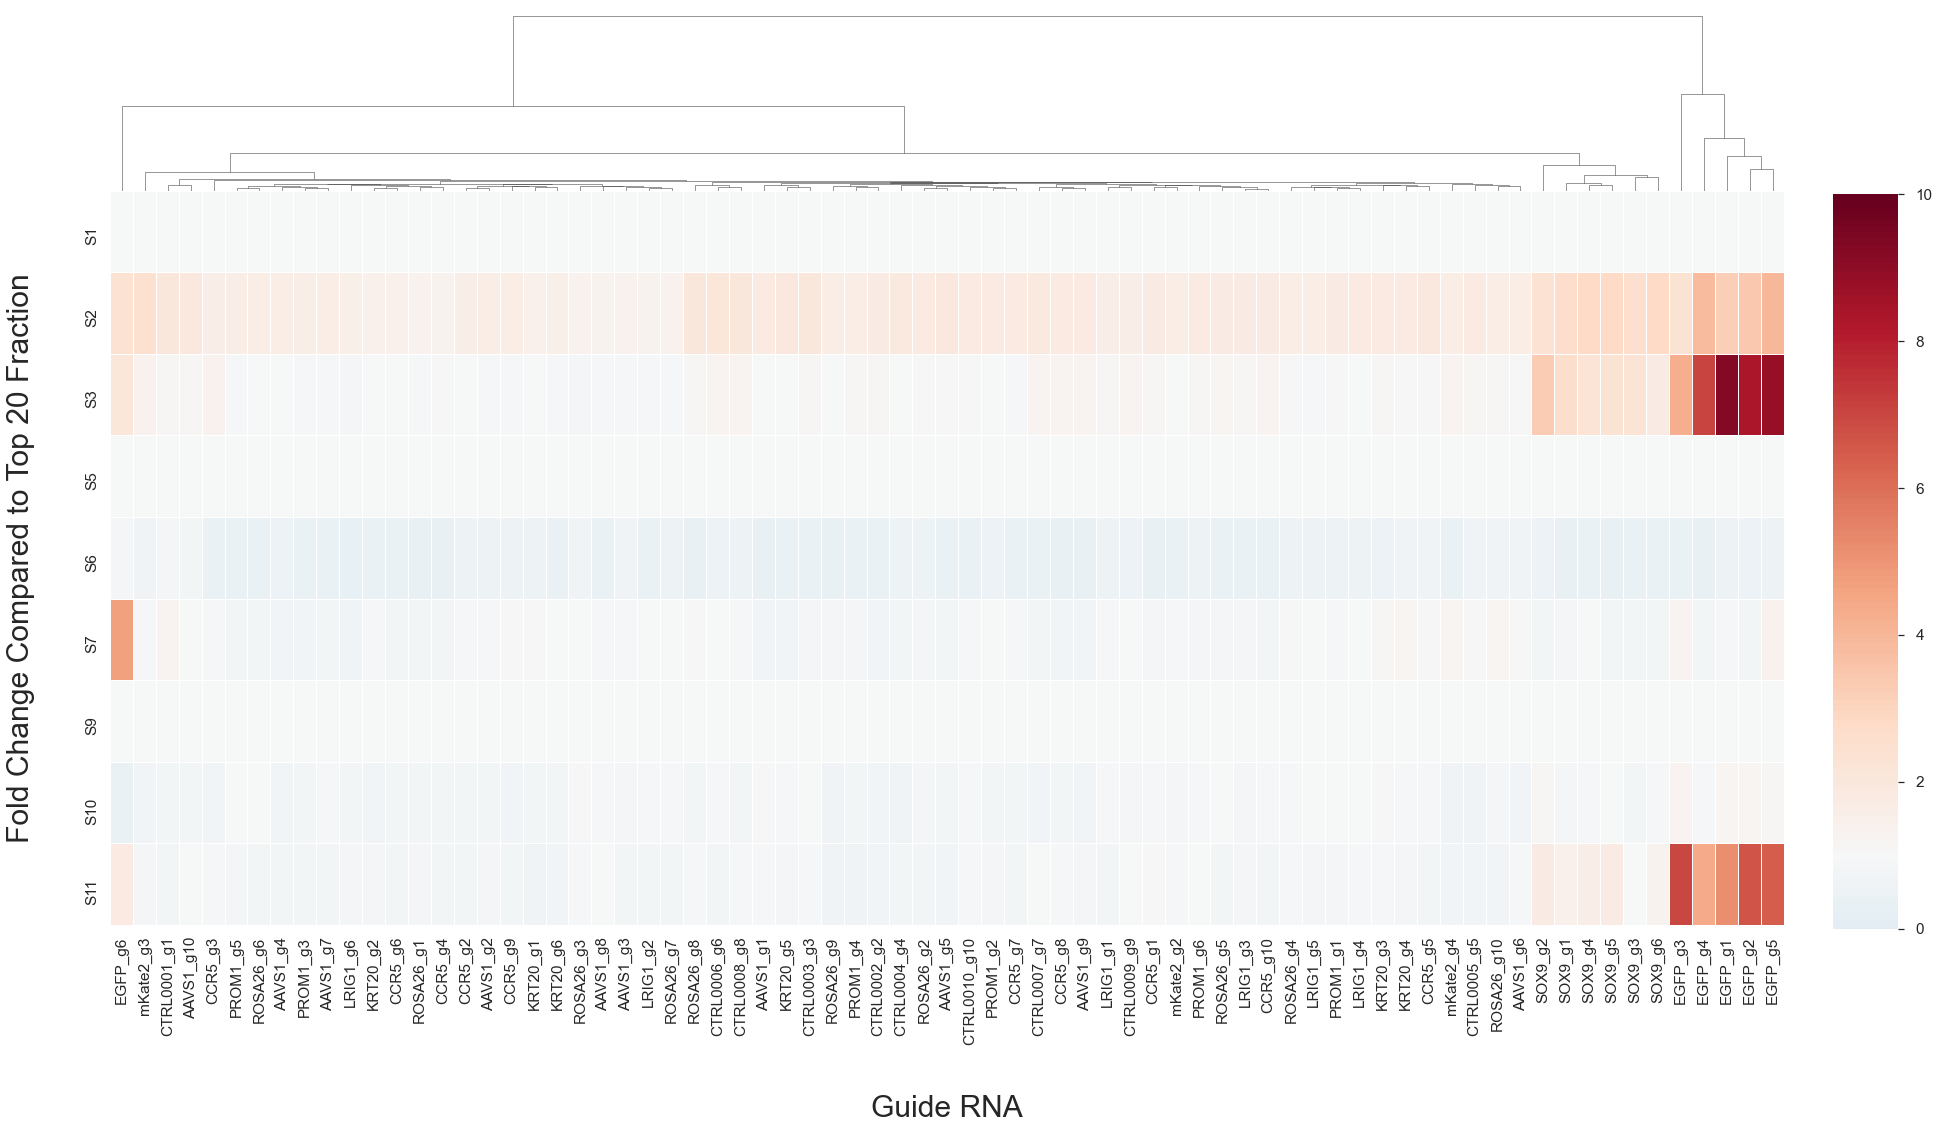

In [76]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(raw_fold_change, 
                         xticklabels = raw_fold_change.columns, 
                         yticklabels = raw_fold_change.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=0,
                         vmax=10,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Heatmap using Original Normalization Pipeline with Total Read Count Normalization and without Log Scaling(for reference comparison)

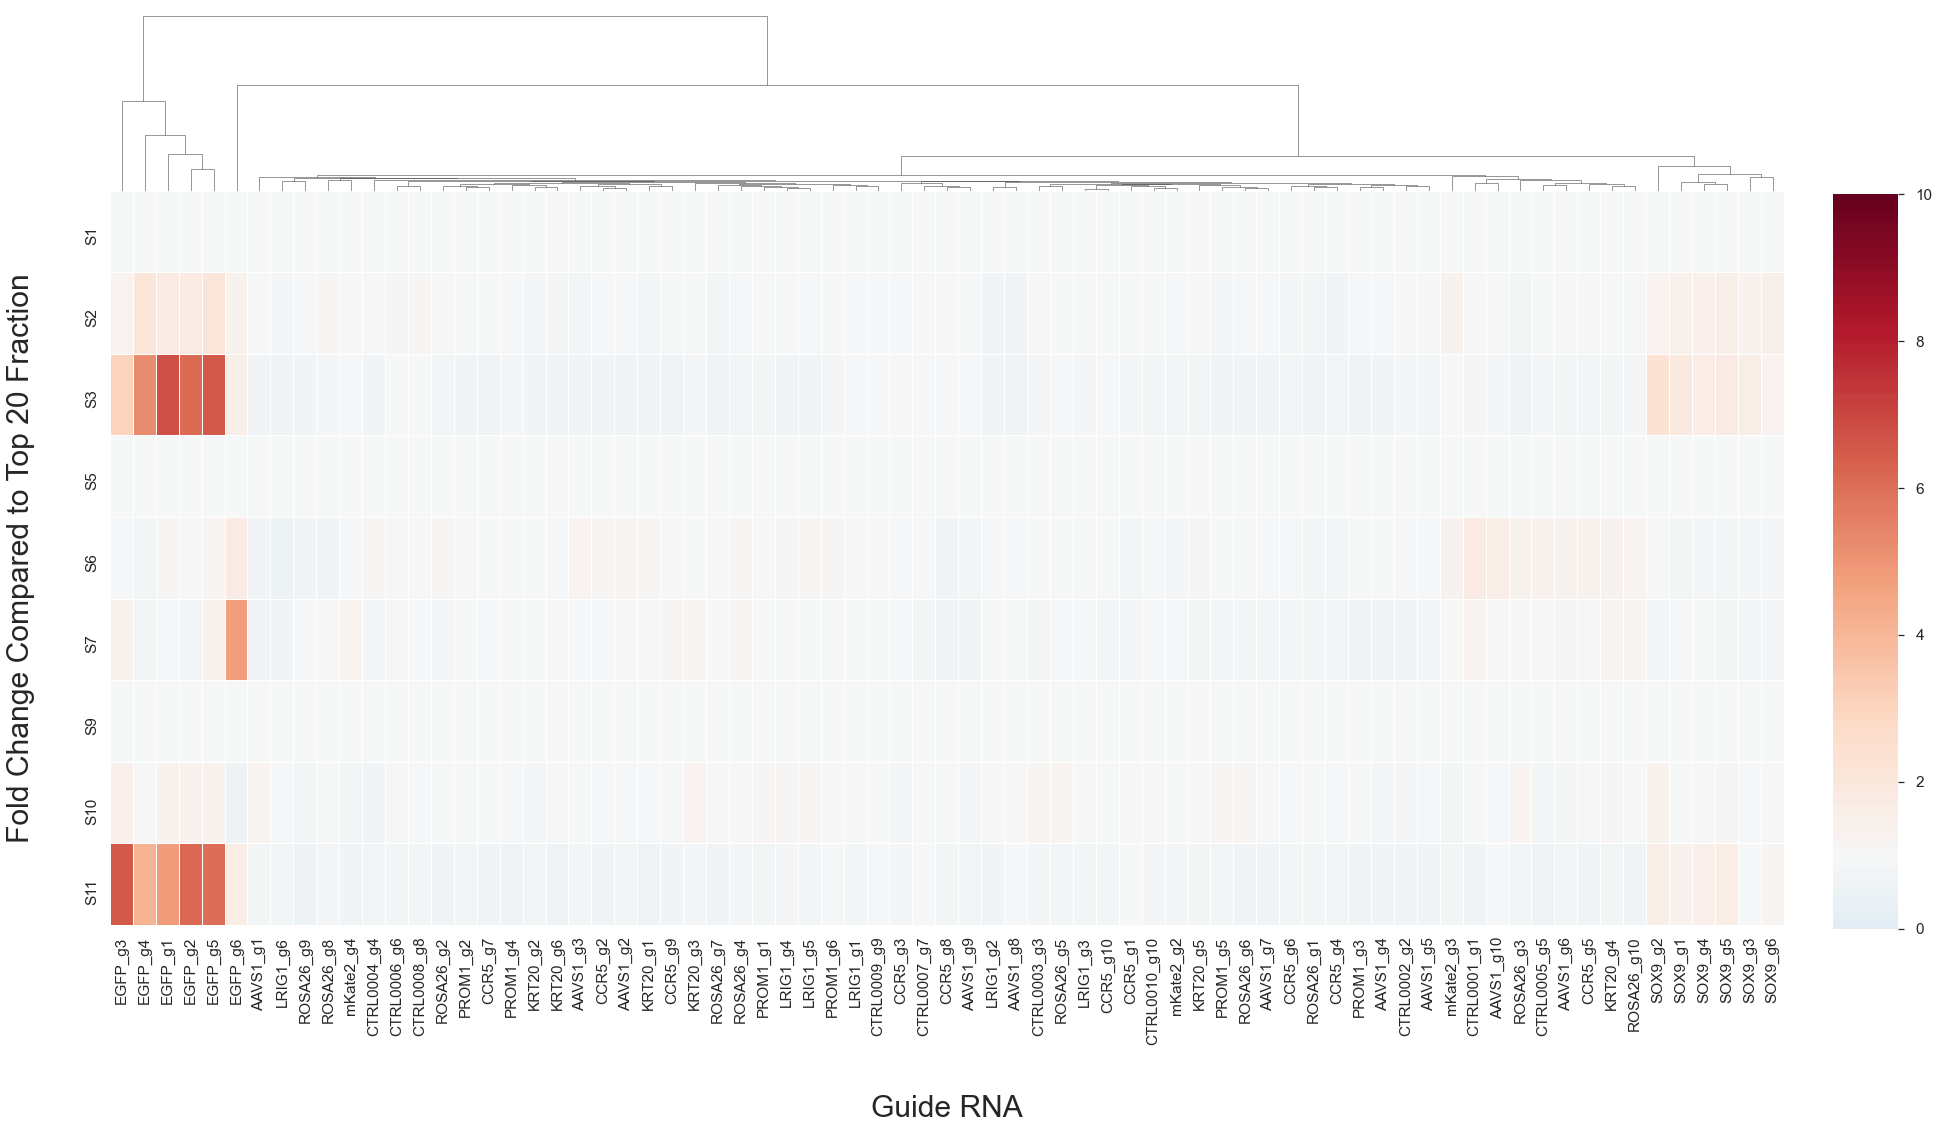

In [77]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(heatmap_df, 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=0,
                         vmax=10,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Heatmap using Original Normalization Pipeline with Total Read Count Normalization and using Scaled Colourbar 

In [78]:
log_norm = LogNorm(vmin=heatmap_df.min().min(), vmax=heatmap_df.max().max())
cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(heatmap_df.min().min())), 1+math.ceil(math.log10(heatmap_df.max().max())))]

### 2^x scale

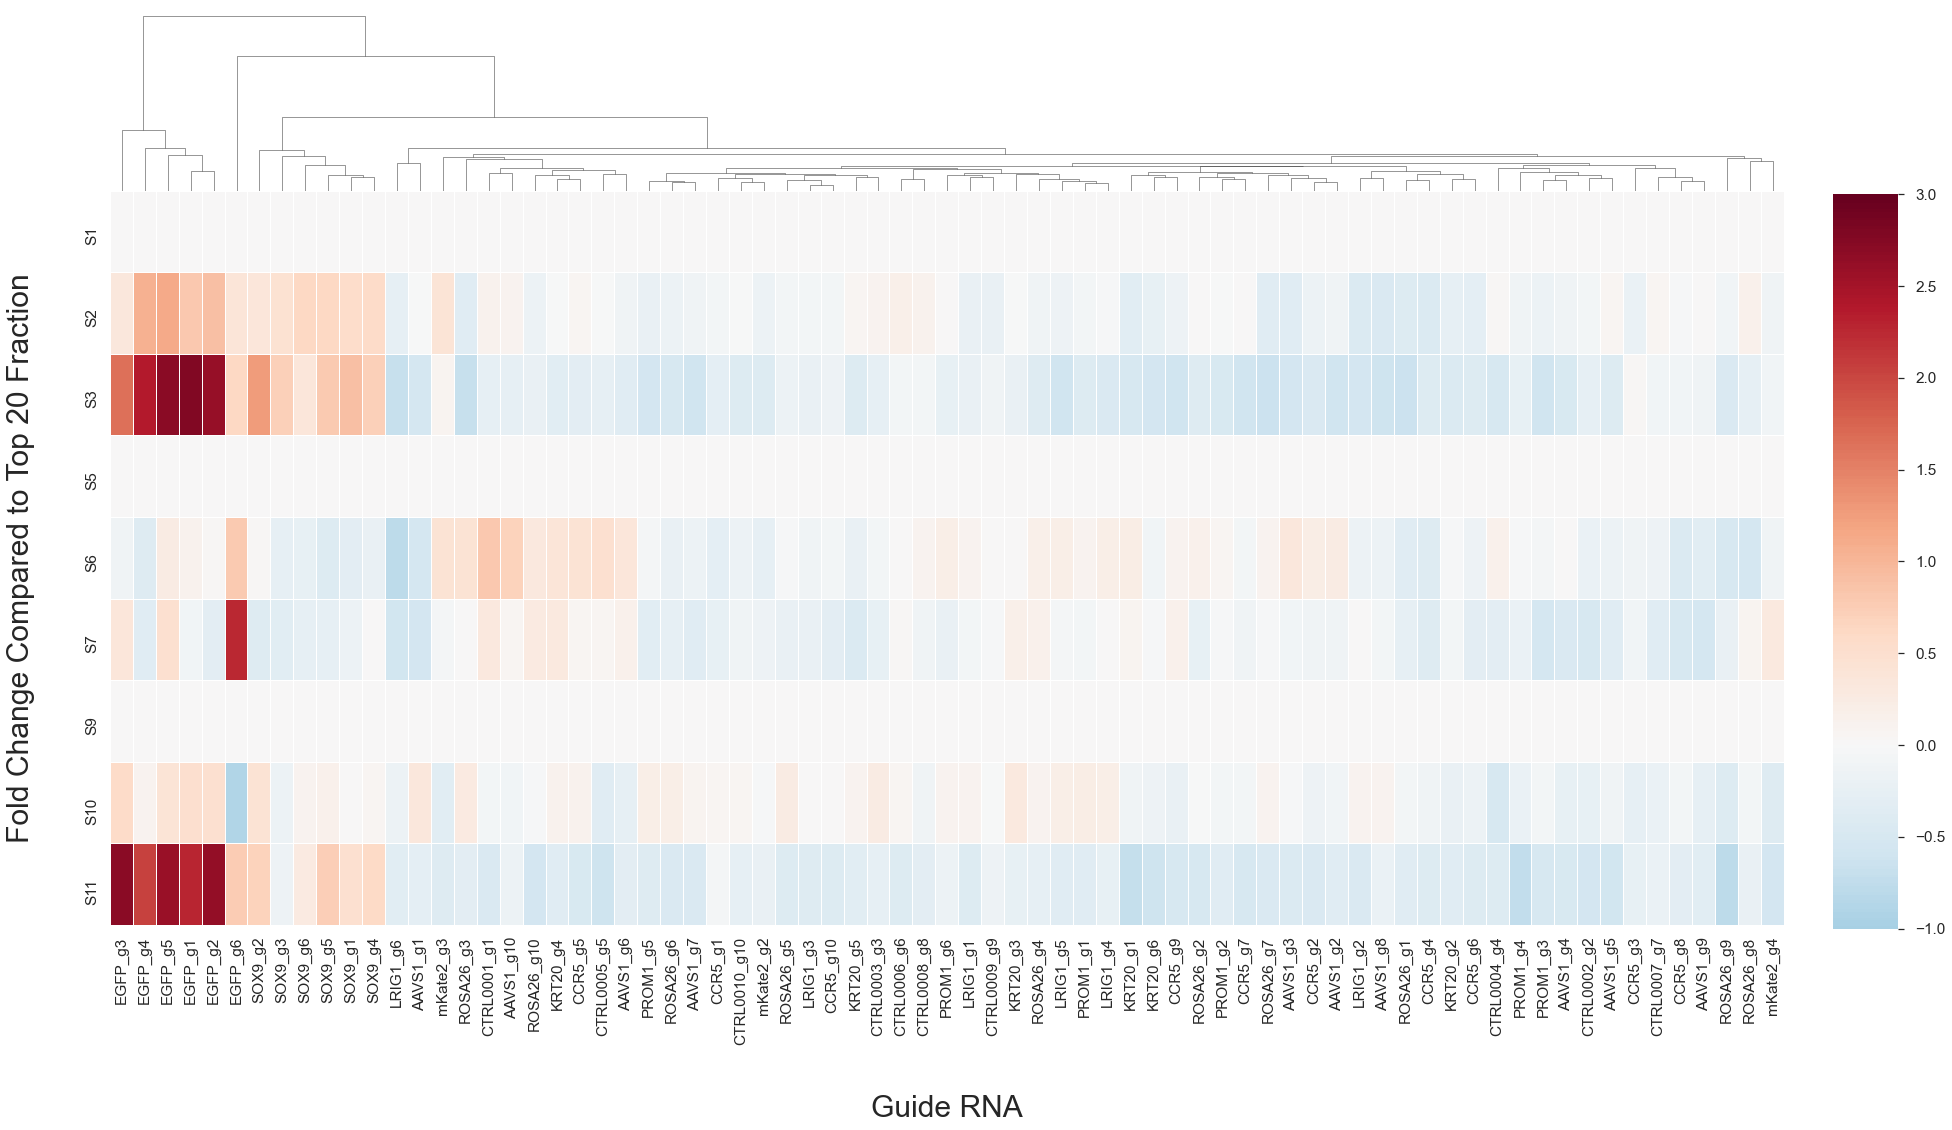

In [79]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(np.log2(heatmap_df), 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=-1,
                         vmax=3,
                         center=0,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

-account for individual guide rna for each gene 

### log2(x) scale

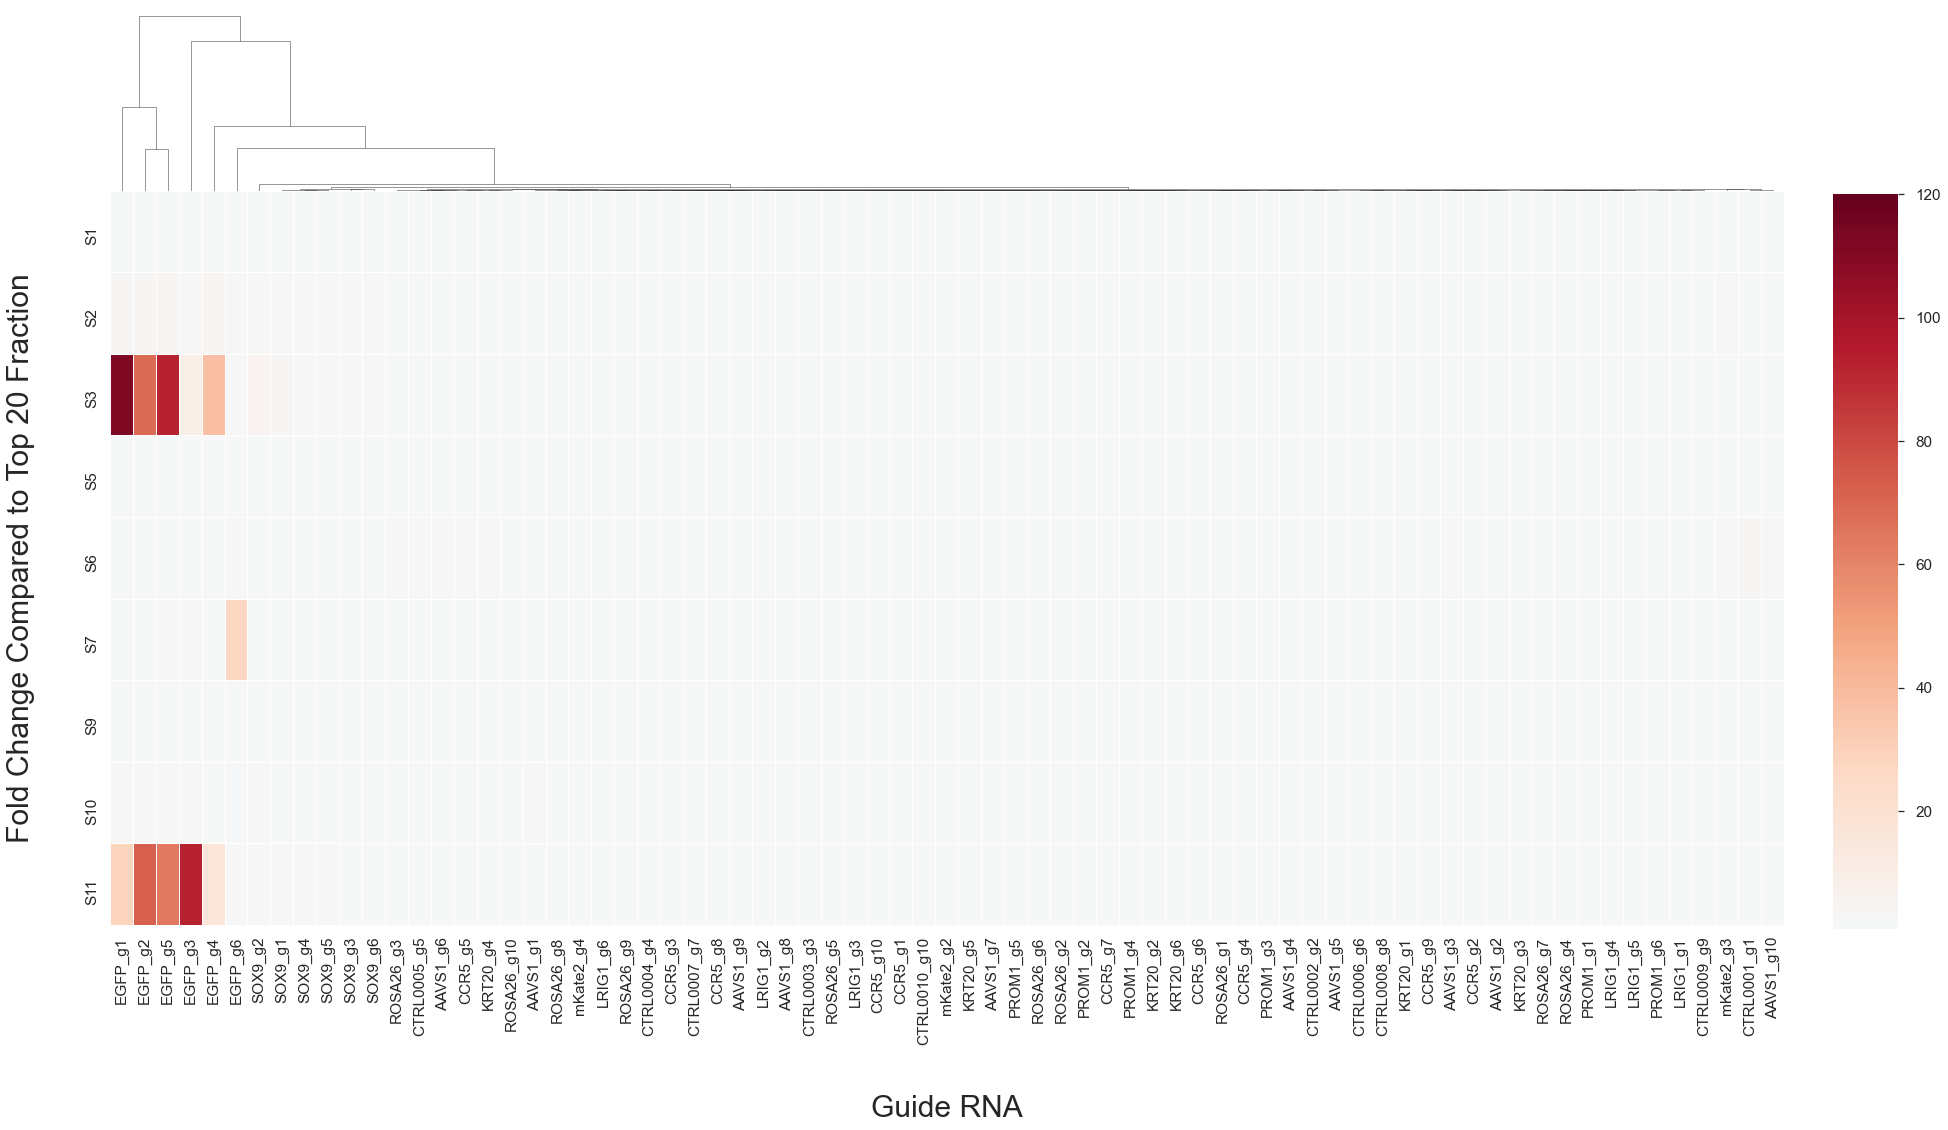

In [80]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(np.power(2, heatmap_df), 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=1,
                         vmax=120,
                         center=2,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### TMM Normalization

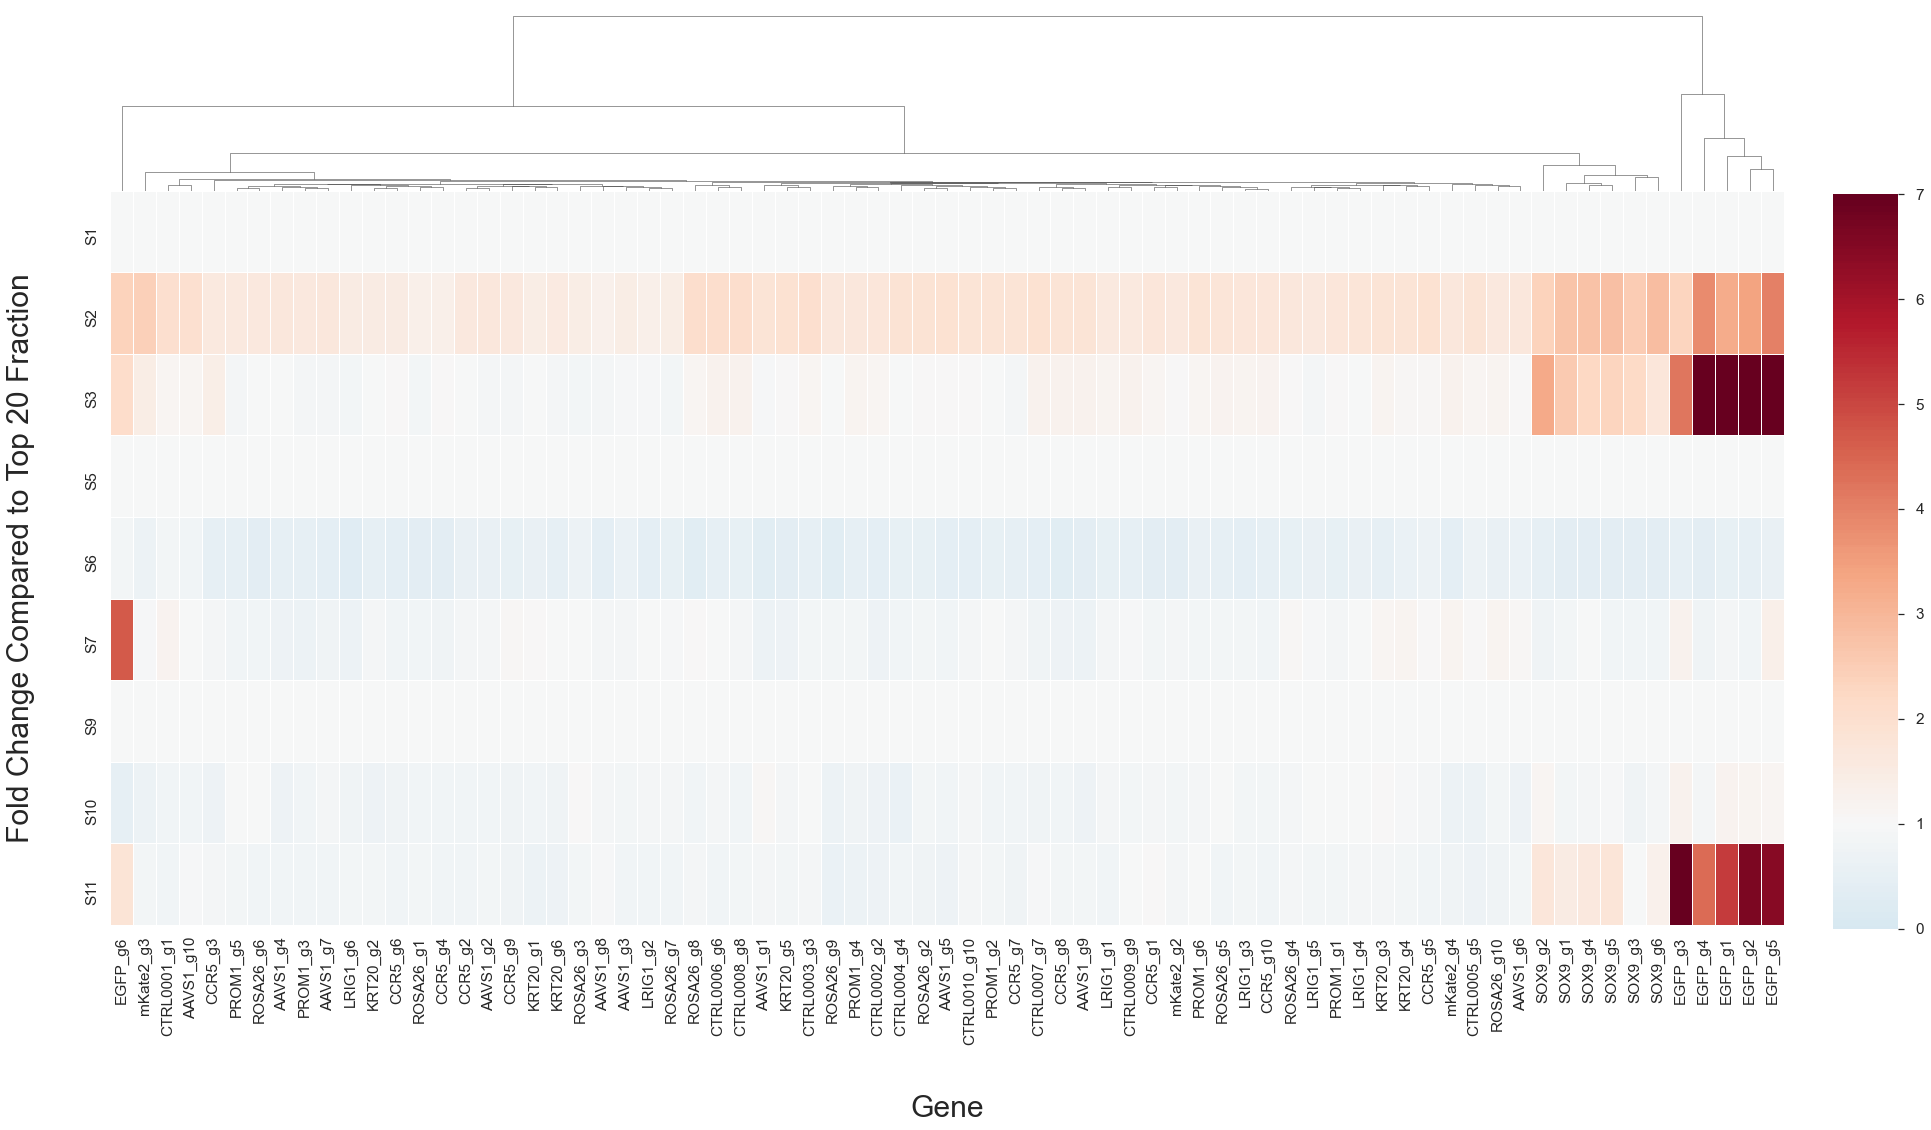

In [81]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(heatmap_tmm_df, 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         vmin=0,
                         vmax=7,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Gene", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### TMM Normalization with Scaled Colourbar

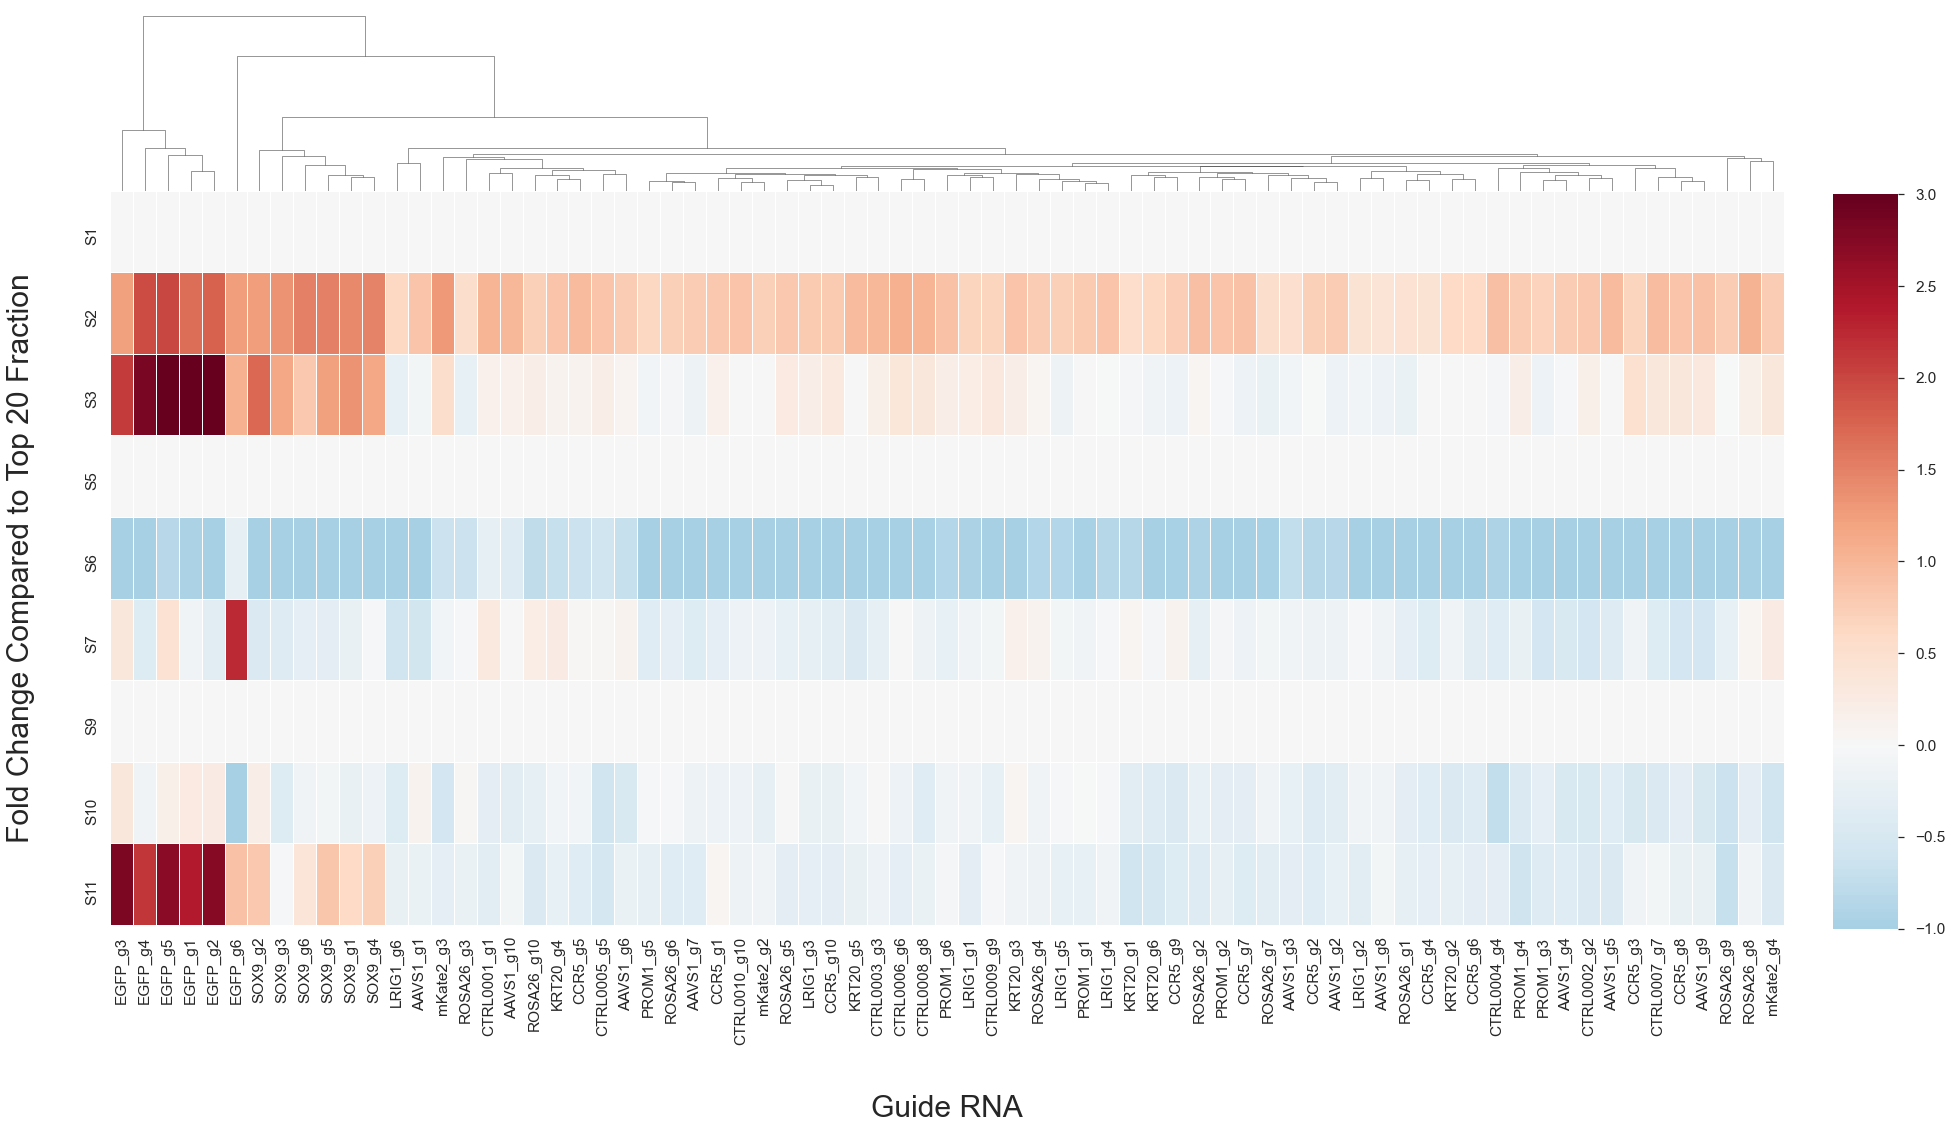

In [82]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(np.log2(heatmap_tmm_df), 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=-1,
                         vmax=3,
                         center=0,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Deseq Normalization

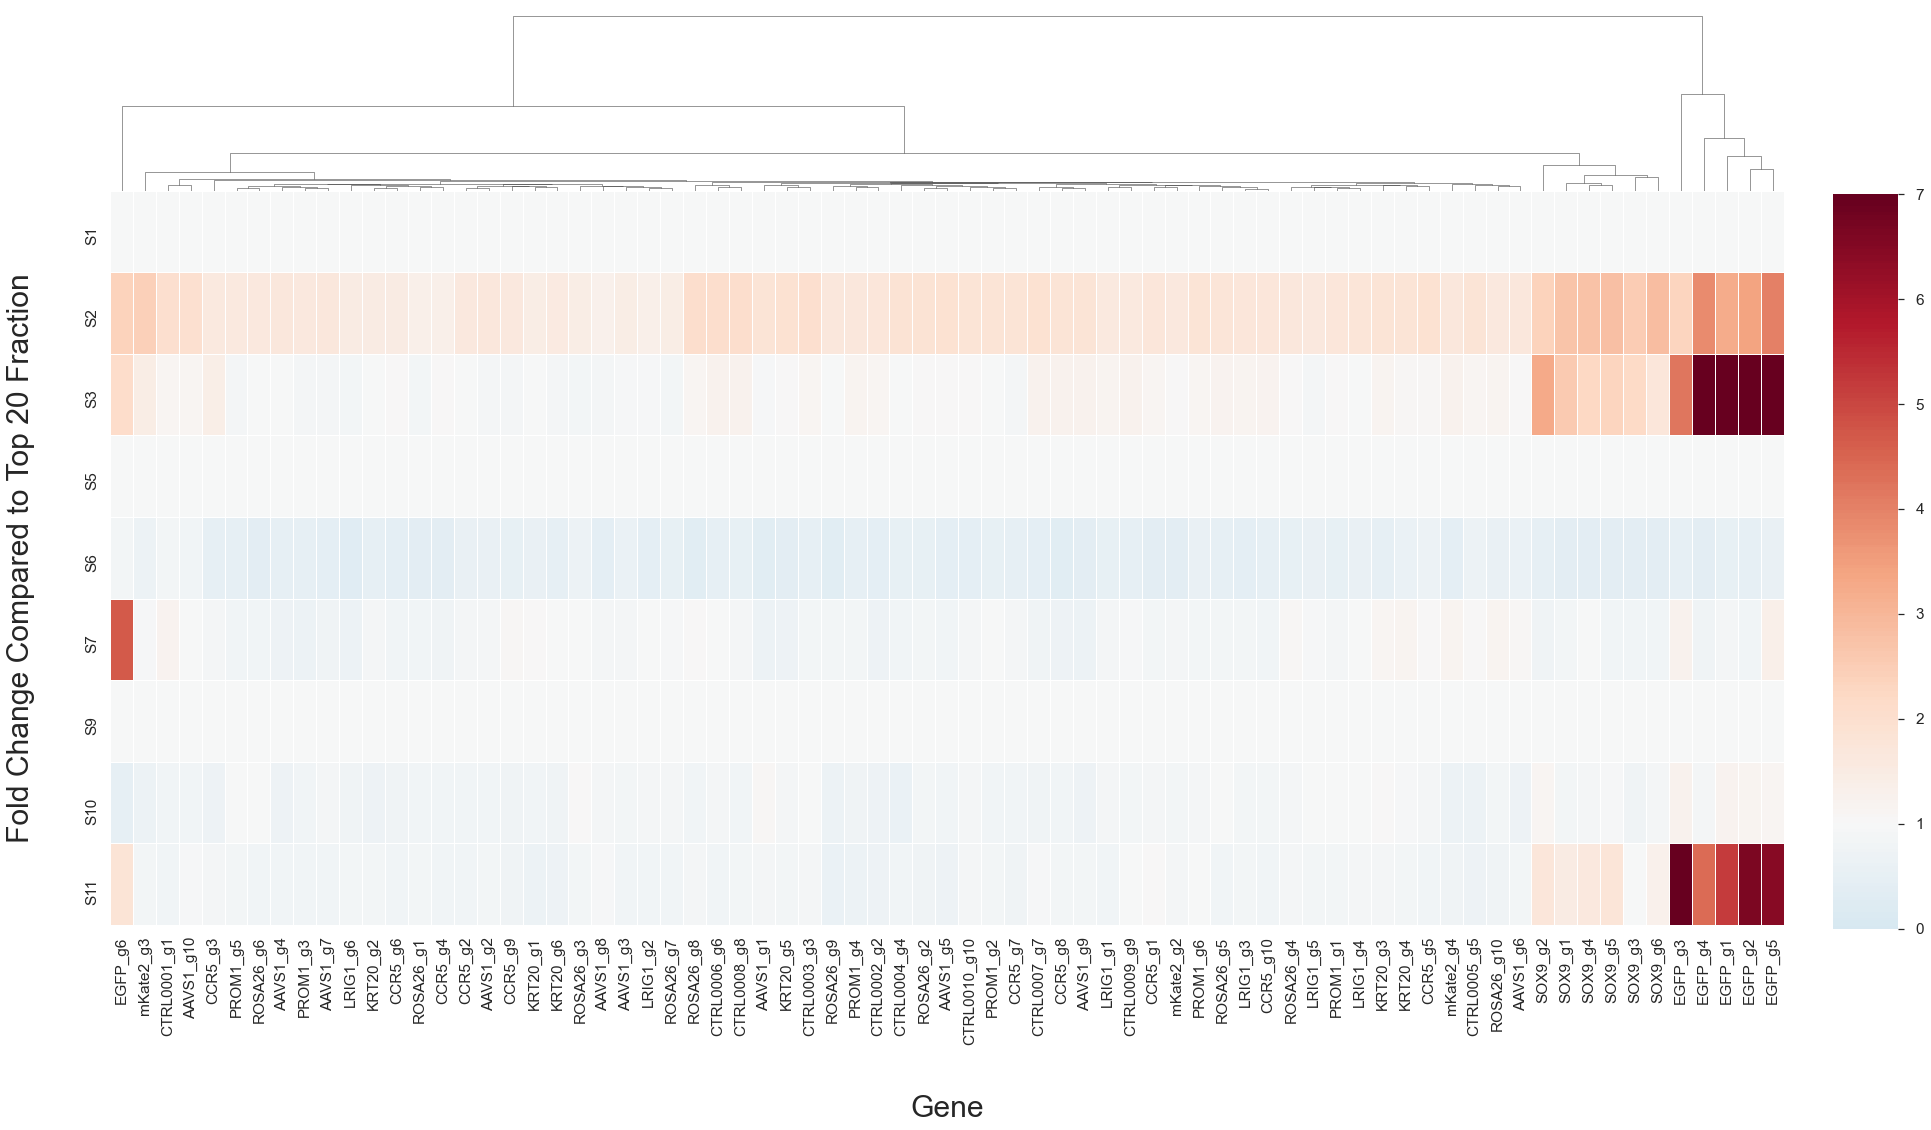

In [83]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(heatmap_deseq_df, 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=0,
                         vmax=7,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Gene", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Deseq Normalization with Scaled Colourbar

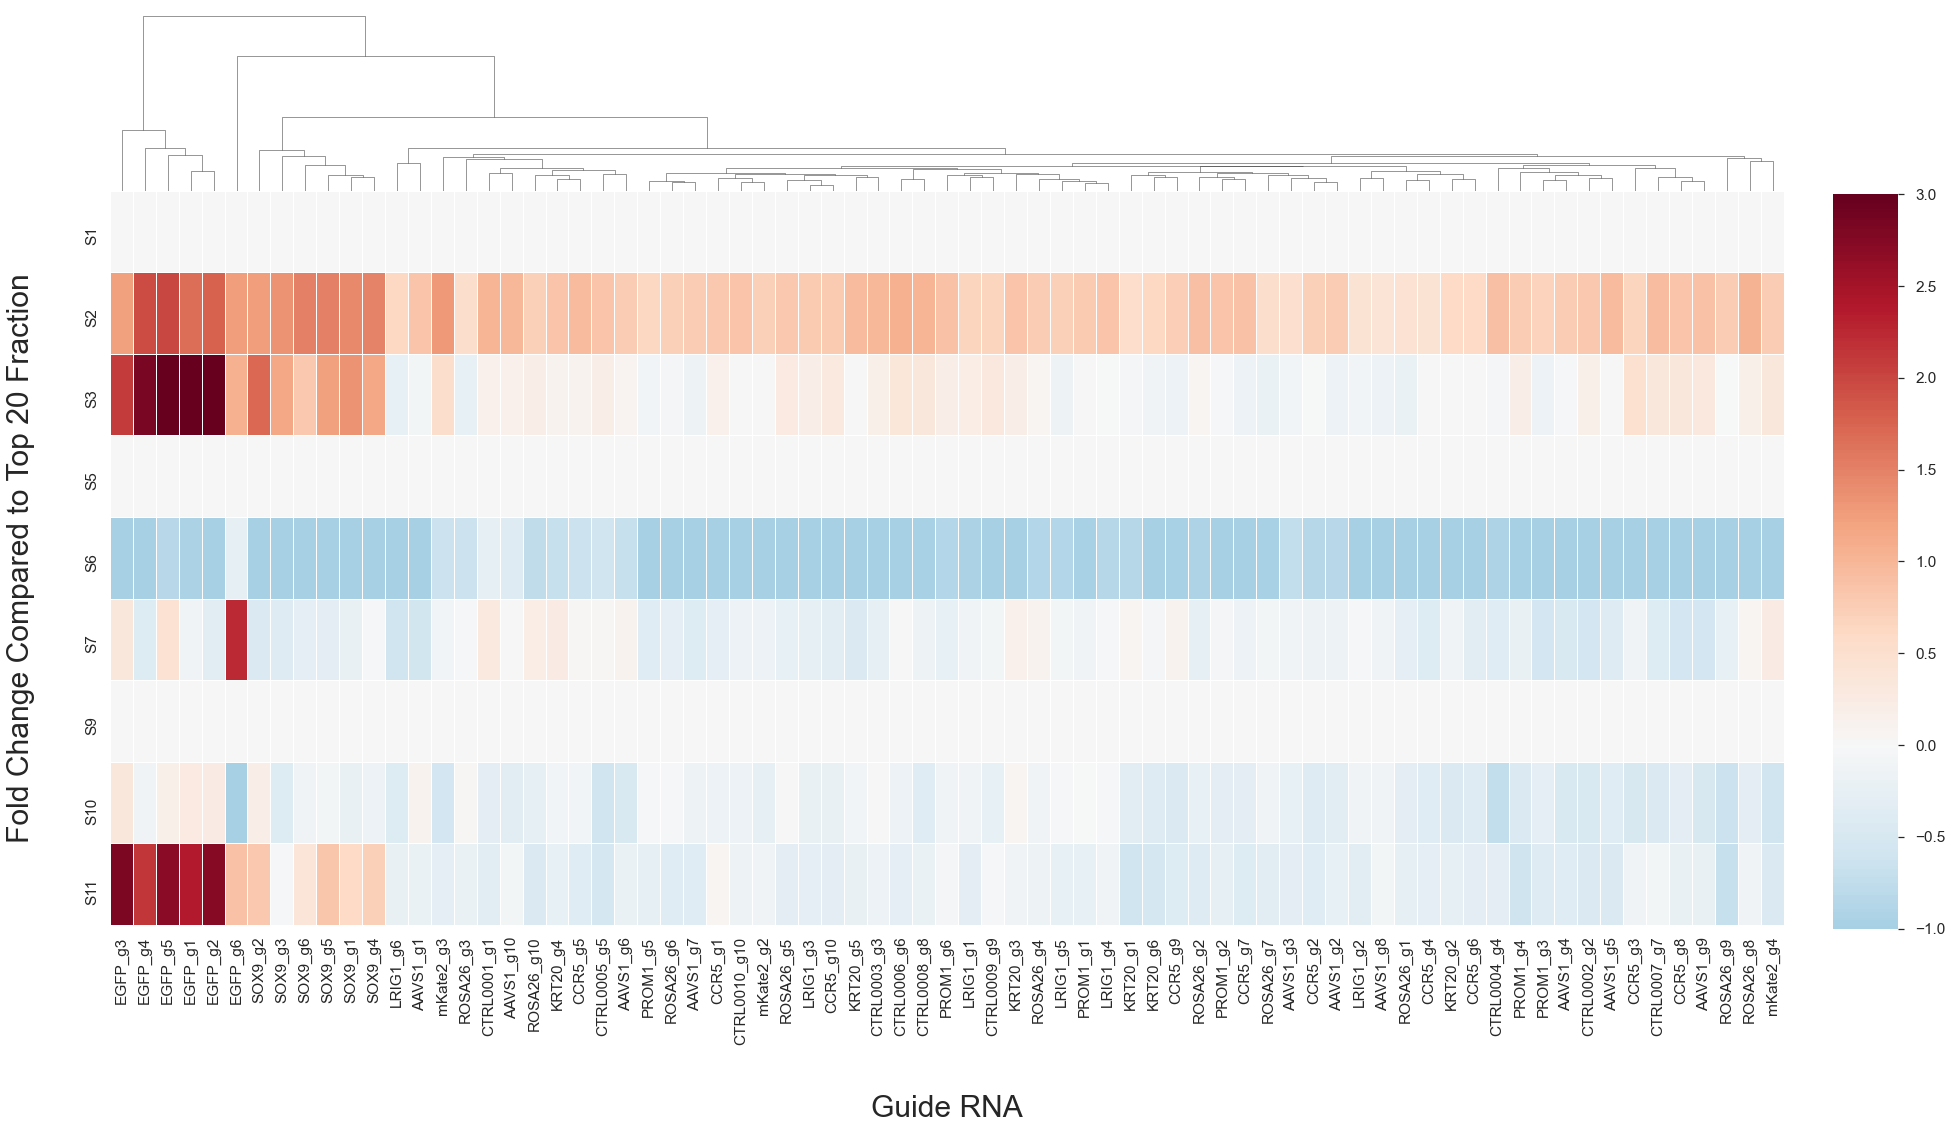

In [84]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(np.log2(heatmap_deseq_df), 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=-1,
                         vmax=3,
                         center=0,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Median Normalization

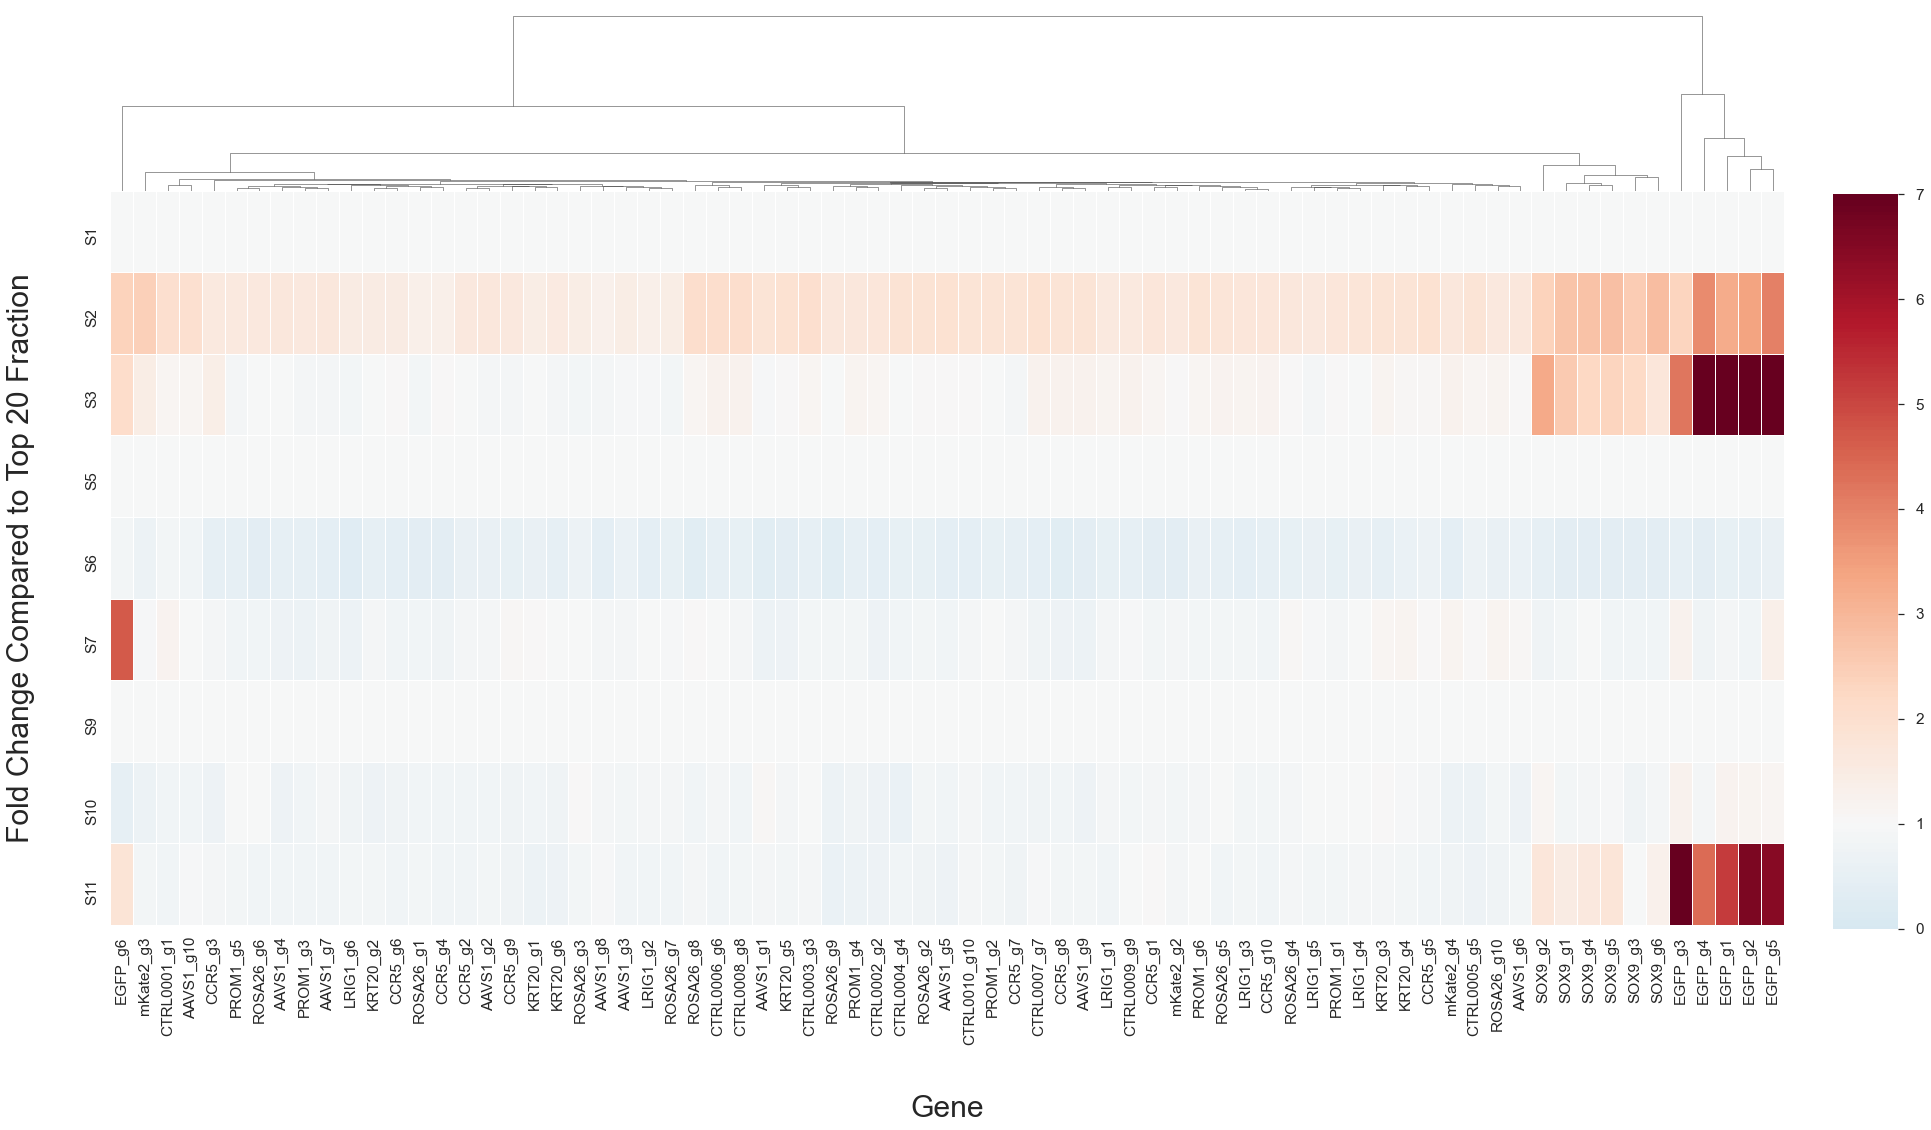

In [85]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(heatmap_median_df, 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=0,
                         vmax=7,
                         center=1,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Gene", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)

### Median Normalization with Scaled Colourbar

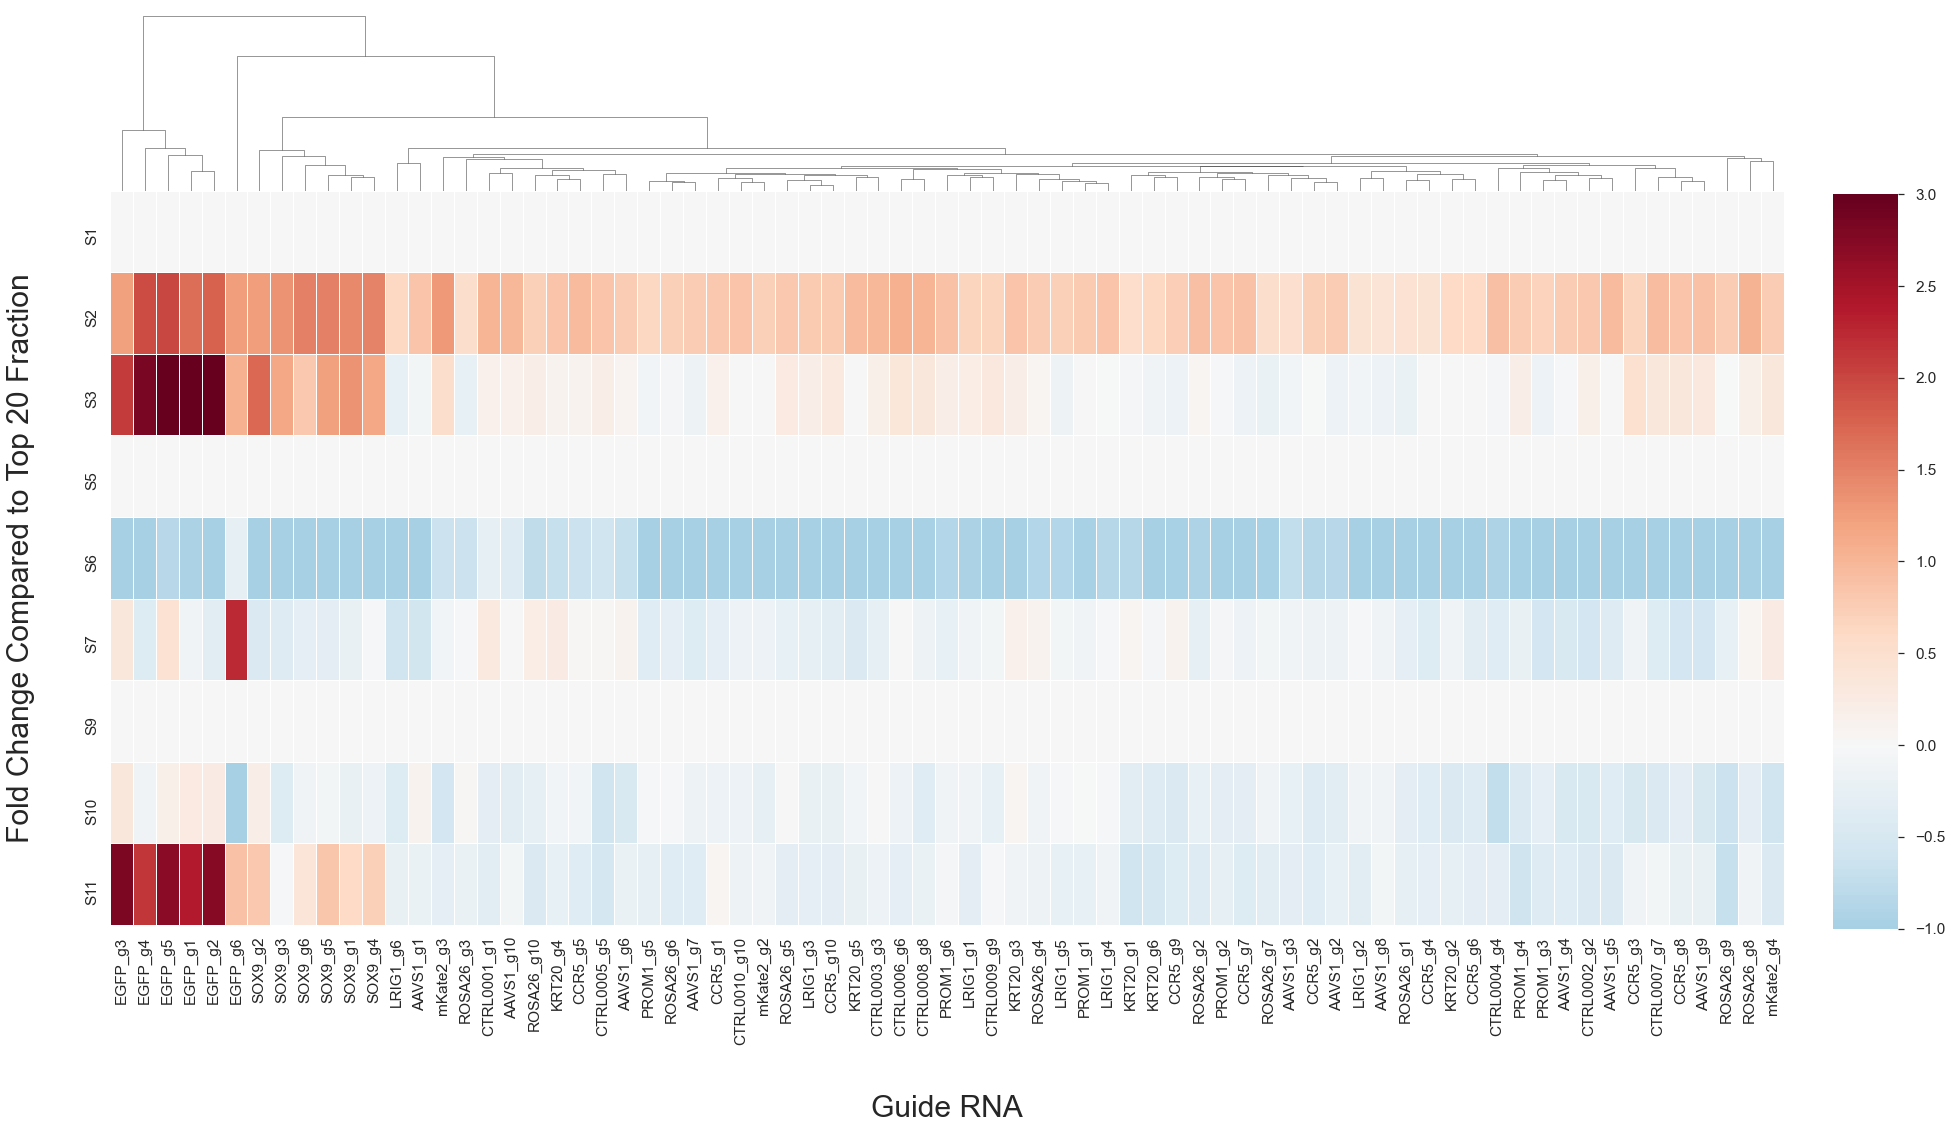

In [86]:
sns.set(font_scale=1.4)
sbs_cos = sns.clustermap(np.log2(heatmap_median_df), 
                         xticklabels = heatmap_df.columns, 
                         yticklabels = heatmap_df.index, 
                         method="average",
                         linewidths=0.004,
                         figsize=(30,15),
                         cbar_pos=(1, 0.13, .03, .68),
                         cmap = "RdBu_r",
                         #norm=log_norm,
                         #cbar_kws={"ticks": cbar_ticks},
                         vmin=-1,
                         vmax=3,
                         center=0,
                         row_cluster=False)

sbs_cos.ax_row_dendrogram.set_visible(False)
sbs_cos.ax_heatmap.set_xlabel("Guide RNA", fontsize=30)
sbs_cos.ax_heatmap.set_ylabel("Fold Change Compared to Top 20 Fraction", fontsize=30)
sbs_cos.ax_heatmap.xaxis.labelpad= 50
sbs_cos.ax_heatmap.yaxis.labelpad= 50
#log scale implementation for depleted guide rnas from bottom fraction
sbs_cos.ax_heatmap.yaxis.tick_left() # x axis on top
sbs_cos.ax_heatmap.yaxis.set_label_position('left')
sbs_cos.ax_heatmap.tick_params(axis='both', which='both', length=0)